# OASIS INFOBYTE - INTERNSHIP

# TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING

# PROBLEM STATEMENT:
The objective of this project is to develop a robust machine learning model capable of accurately predicting the price of a car based on a multitude of factors. The price of a car is influenced by numerous variables, including the brand's goodwill, specific features of the car, horsepower, mileage, and more. Consequently, building a reliable car price prediction model holds significant research importance in the field of machine learning.

# Importing Libraries

In [1]:
# Data loading and manipulation
import pandas as pd
import numpy as np

#Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Feature selection/engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA

# Machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Model evaluationcore
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
cars = pd.read_csv('CarPrice.csv')

In [3]:
cars

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [4]:
#top 5 rows
cars.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [5]:
#bottom 5 rows
cars.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

# Data Preprocessing

In [6]:
#dataset information
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Drop the 'CarName' and Car ID column
cars.drop(columns=['car_ID','CarName'], inplace=True)

In [8]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [9]:
cars.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front       88.6      168.8      64.1       48.8        2548   
1          front       88.6      168.8      64.1       48.8        2548   
2          front       94.5      171.2      65.5       52.4        2823   
3          front       99.8      176.6      66.2       54.3        2337   
4          front       99.4      176.6      66.4       54.3        2824   

  enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
0       dohc           four         130       mpfi       3.47    2.68   
1       dohc           four         130       mpfi       3.47    2.68   
2       ohcv            six         152       mpfi       2.68    3.47   
3        ohc           four         109       mpfi       3.19    3.40   
4        ohc           five         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm  citympg  highwaympg    price  
0               9.0         111     5000       21          27  13495.0  
1               9.0         111     5000       21          27  16500.0  
2               9.0         154     5000       19          26  16500.0  
3              10.0         102     5500       24          30  13950.0  
4               8.0         115     5500       18          22  17450.0

In [10]:
cars.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
cars.shape

(205, 24)

In [12]:
cars.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [13]:
cars.describe()

symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [14]:
# Handle missing values, if any
cars.dropna(inplace=True)

In [15]:
cars.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
cars.duplicated().sum()

1

In [17]:
cars[cars.duplicated()]

symboling fueltype aspiration doornumber    carbody drivewheel  \
120          1      gas        std       four  hatchback        fwd   

    enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
120          front       93.7      157.3      63.8       50.6        1967   

    enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  \
120        ohc           four          90       2bbl       2.97    3.23   

     compressionratio  horsepower  peakrpm  citympg  highwaympg   price  
120               9.4          68     5500       31          38  6229.0

In [18]:
cars.drop_duplicates(inplace=True)

In [19]:
cars.duplicated().sum()

0

In [20]:
cars['doornumber'] = cars['doornumber'].replace({'four':4,'two':2})

In [21]:
cars

symboling fueltype aspiration  doornumber      carbody drivewheel  \
0            3      gas        std           2  convertible        rwd   
1            3      gas        std           2  convertible        rwd   
2            1      gas        std           2    hatchback        rwd   
3            2      gas        std           4        sedan        fwd   
4            2      gas        std           4        sedan        4wd   
5            2      gas        std           2        sedan        fwd   
6            1      gas        std           4        sedan        fwd   
7            1      gas        std           4        wagon        fwd   
8            1      gas      turbo           4        sedan        fwd   
9            0      gas      turbo           2    hatchback        4wd   
10           2      gas        std           2        sedan        rwd   
11           0      gas        std           4        sedan        rwd   
12           0      gas        std           2        sedan        rwd   
13           0      gas        std           4        sedan        rwd   
14           1      gas        std           4        sedan        rwd   
15           0      gas        std           4        sedan        rwd   
16           0      gas        std           2        sedan        rwd   
17           0      gas        std           4        sedan        rwd   
18           2      gas        std           2    hatchback        fwd   
19           1      gas        std           2    hatchback        fwd   
20           0      gas        std           4        sedan        fwd   
21           1      gas        std           2    hatchback        fwd   
22           1      gas        std           2    hatchback        fwd   
23           1      gas      turbo           2    hatchback        fwd   
24           1      gas        std           4    hatchback        fwd   
25           1      gas        std           4        sedan        fwd   
26           1      gas        std           4        sedan        fwd   
27           1      gas      turbo           2        sedan        fwd   
28          -1      gas        std           4        wagon        fwd   
29           3      gas      turbo           2    hatchback        fwd   
30           2      gas        std           2    hatchback        fwd   
31           2      gas        std           2    hatchback        fwd   
32           1      gas        std           2    hatchback        fwd   
33           1      gas        std           2    hatchback        fwd   
34           1      gas        std           2    hatchback        fwd   
35           0      gas        std           4        sedan        fwd   
36           0      gas        std           4        wagon        fwd   
37           0      gas        std           2    hatchback        fwd   
38           0      gas        std           2    hatchback        fwd   
39           0      gas        std           4        sedan        fwd   
40           0      gas        std           4        sedan        fwd   
41           0      gas        std           4        sedan        fwd   
42           1      gas        std           2        sedan        fwd   
43           0      gas        std           4        sedan        rwd   
44           1      gas        std           2        sedan        fwd   
45           0      gas        std           4        sedan        fwd   
46           2      gas        std           2    hatchback        rwd   
47           0      gas        std           4        sedan        rwd   
48           0      gas        std           4        sedan        rwd   
49           0      gas        std           2        sedan        rwd   
50           1      gas        std           2    hatchback        fwd   
51           1      gas        std           2    hatchback        fwd   
52           1      gas        std           2    hatchback        fwd   
53       

In [22]:
cars.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [23]:
cars.isna().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [24]:
#columns which has numerical dtypes
numerical_columns =cars.select_dtypes(include='number').columns.tolist()
numerical_columns

['symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [25]:
#columns which has object dtypes
categorical_columns = cars.select_dtypes(include='object').columns.tolist()
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

# Data Visualizations

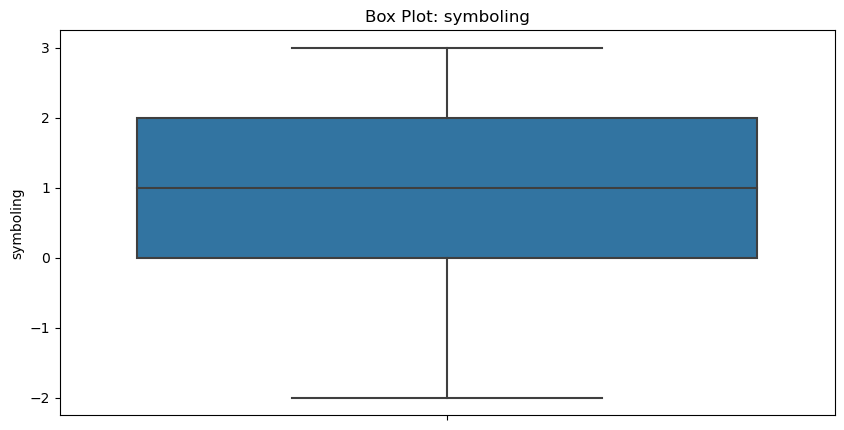

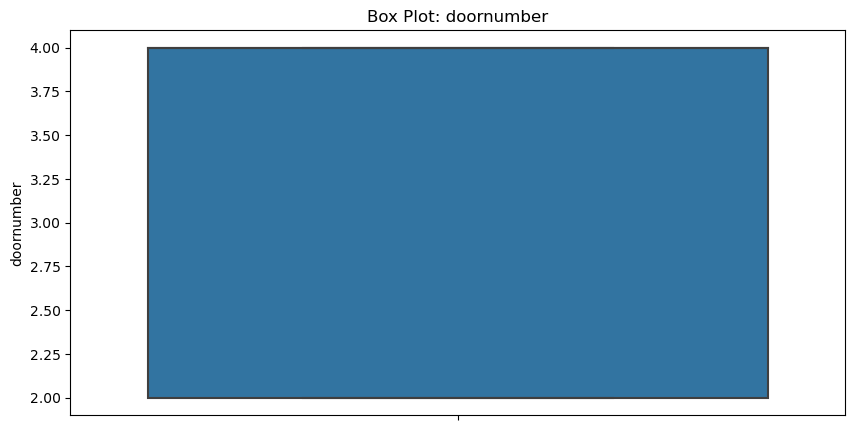

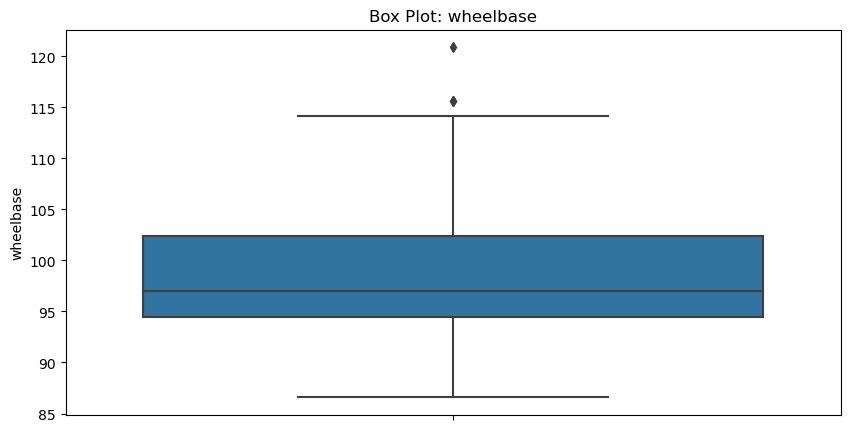

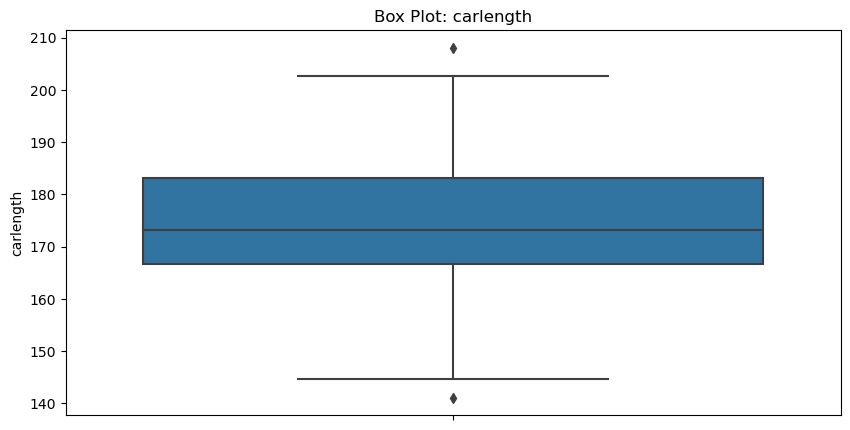

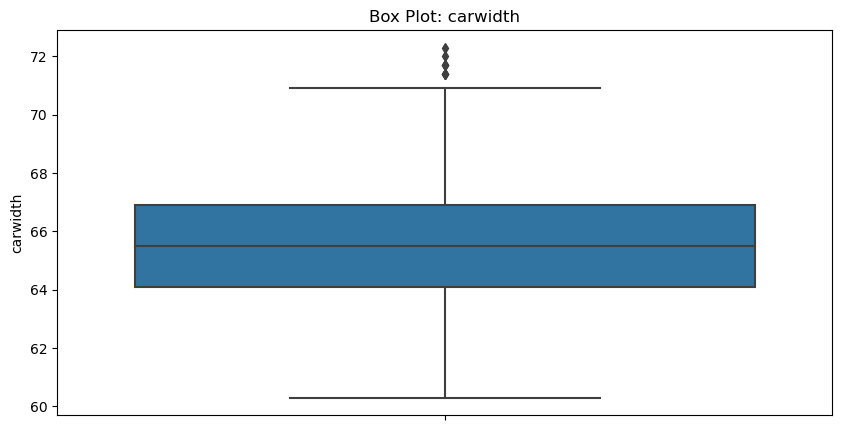

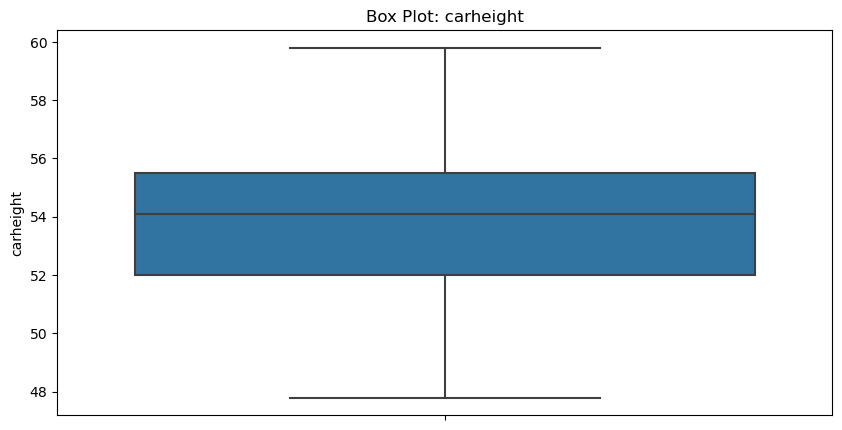

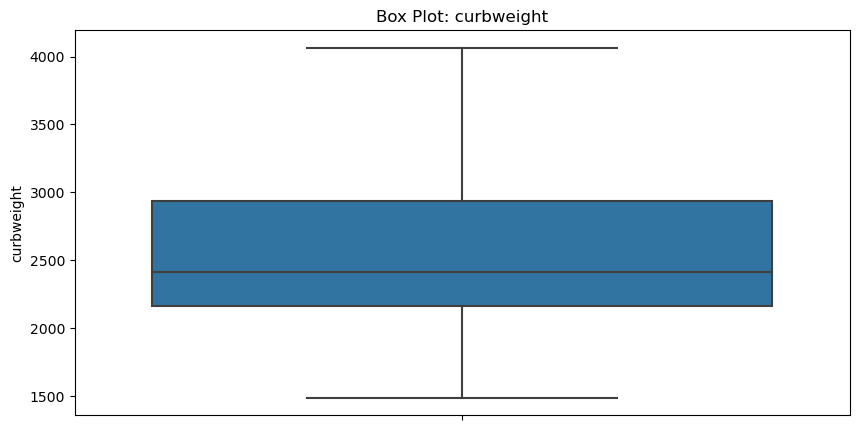

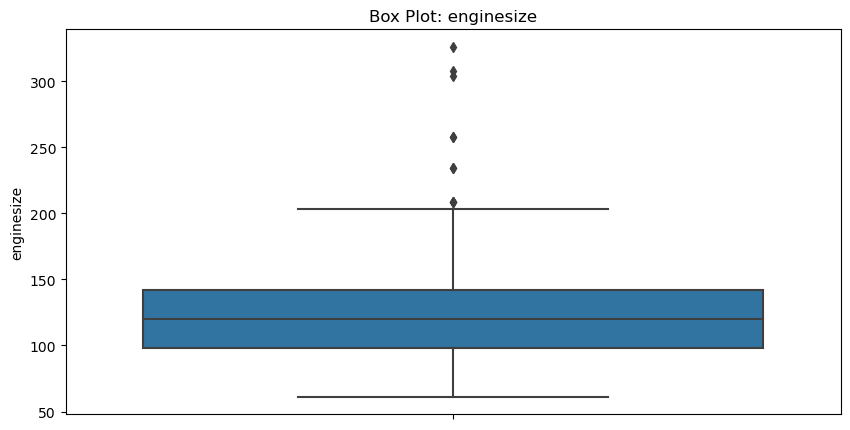

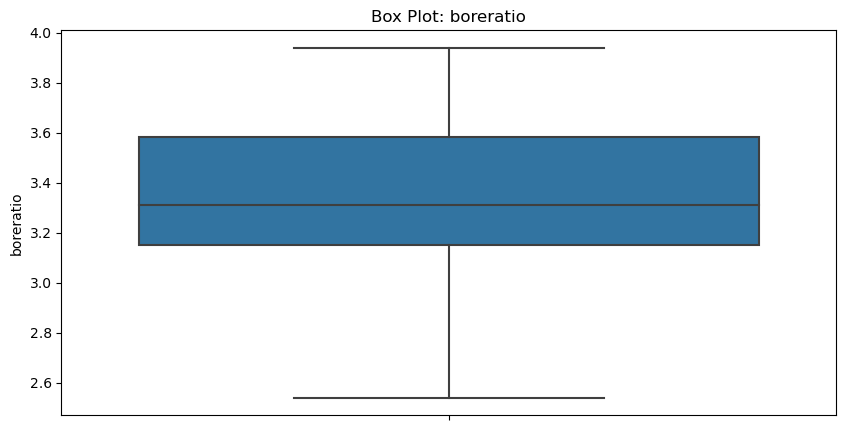

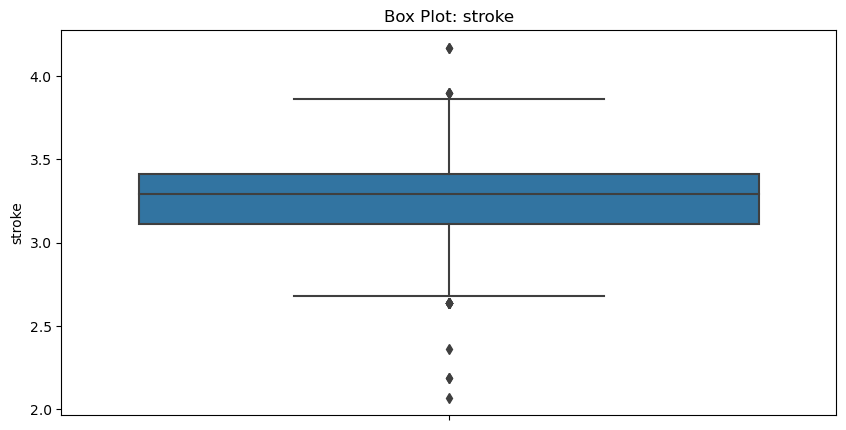

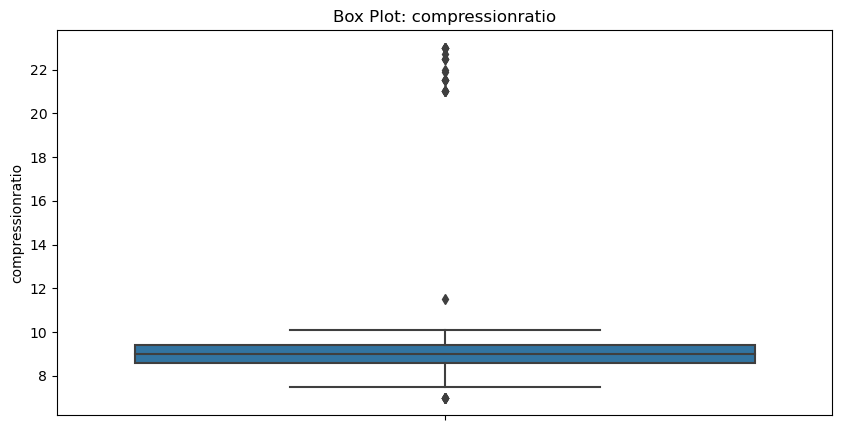

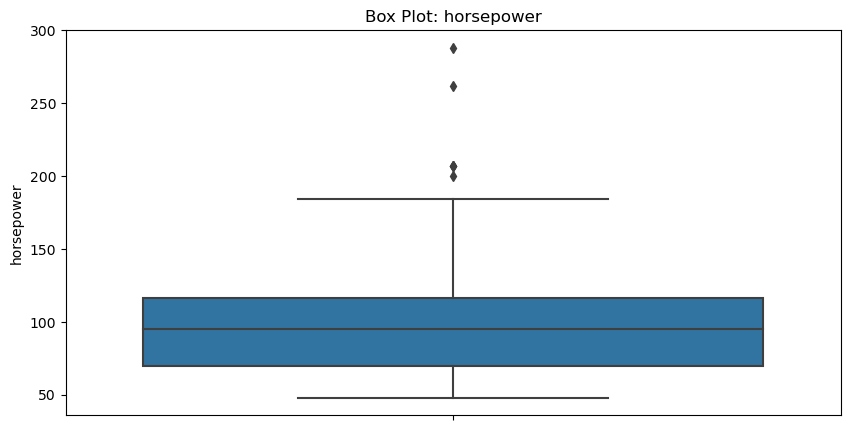

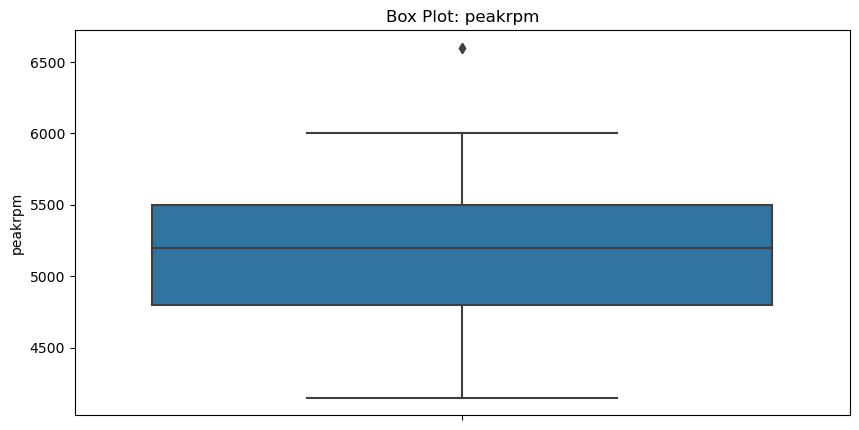

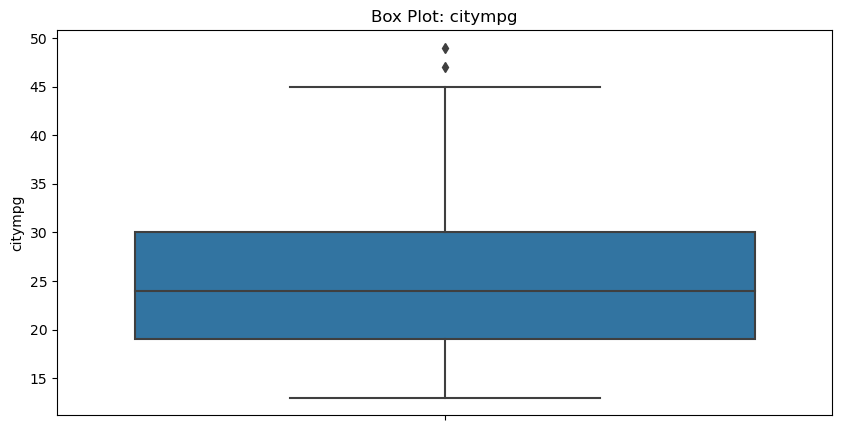

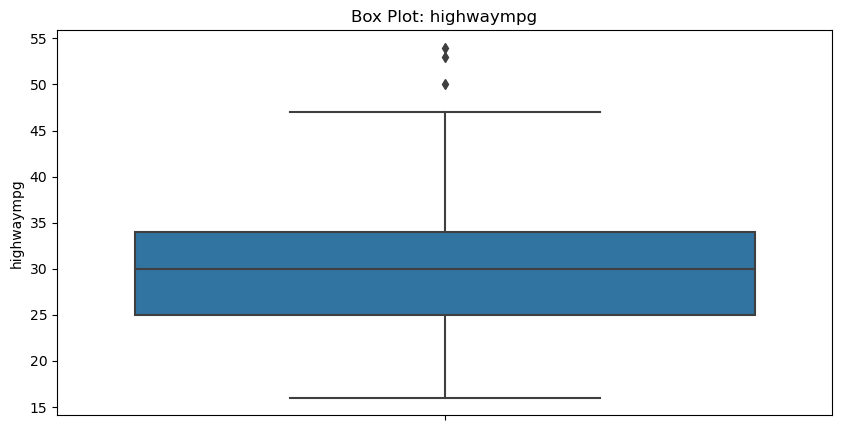

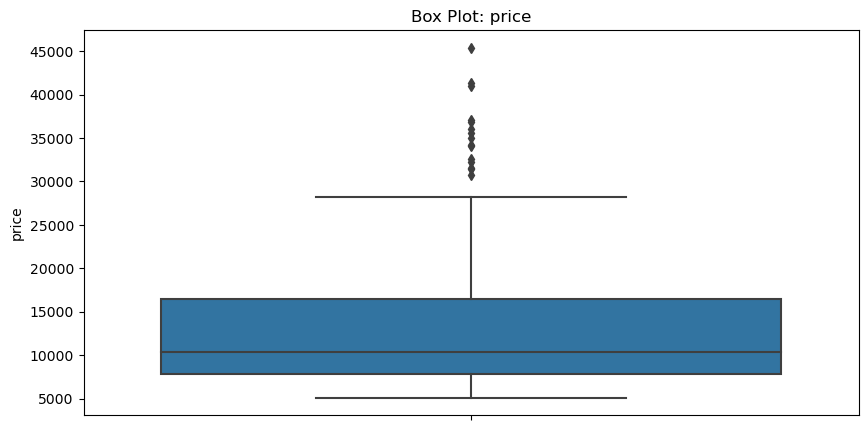

In [26]:
# Plot box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=cars, y=column)
    plt.title(f'Box Plot: {column}')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Calculate the IQR for each numerical column
Q1 = cars[numerical_columns].quantile(0.25)
Q3 = cars[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers
threshold = 1.5

# Remove outliers from each numerical column
cars= cars[~((cars[numerical_columns] < (Q1 - threshold * IQR)) | (cars[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

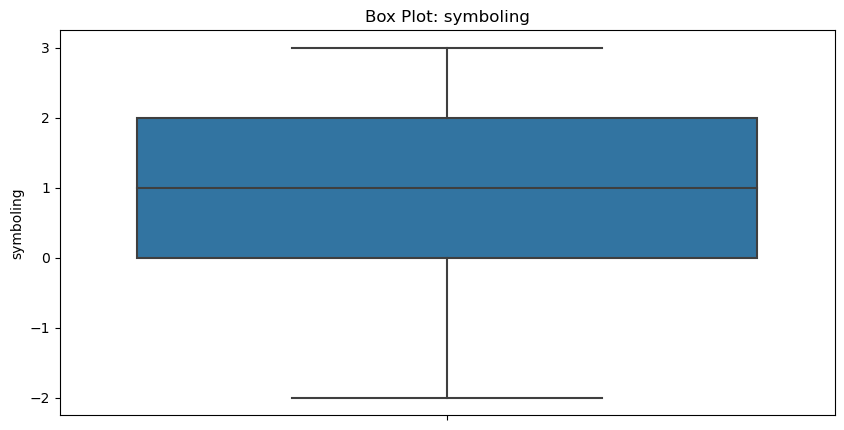

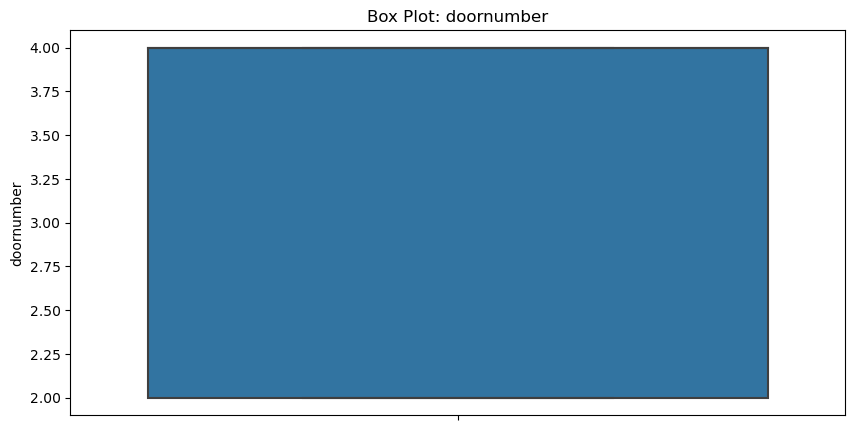

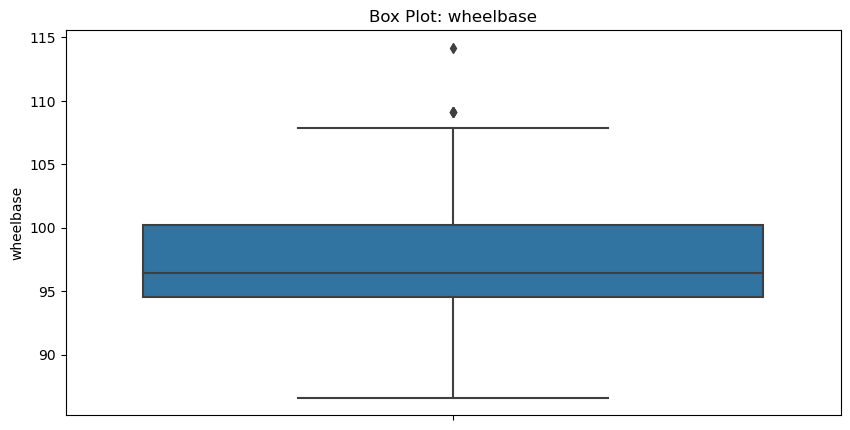

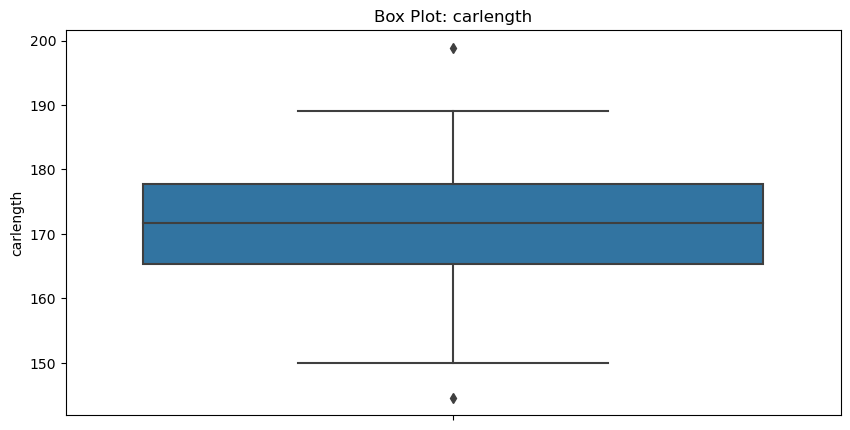

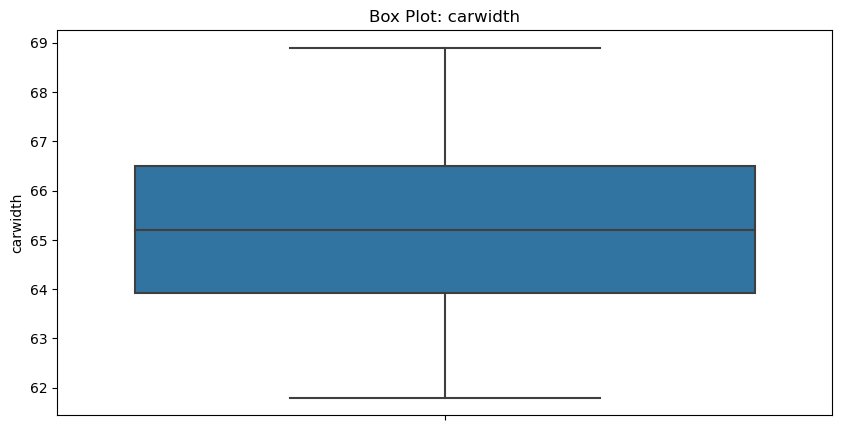

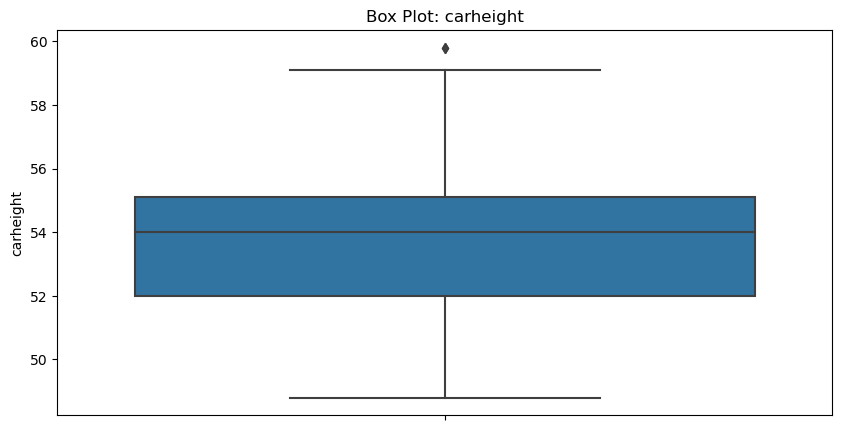

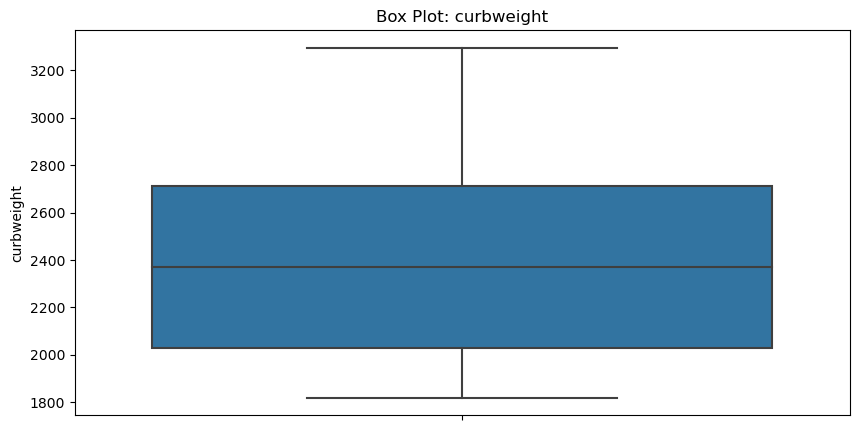

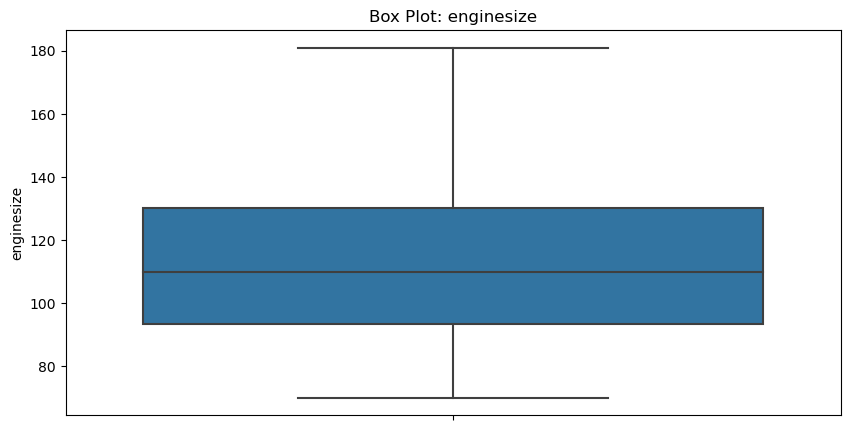

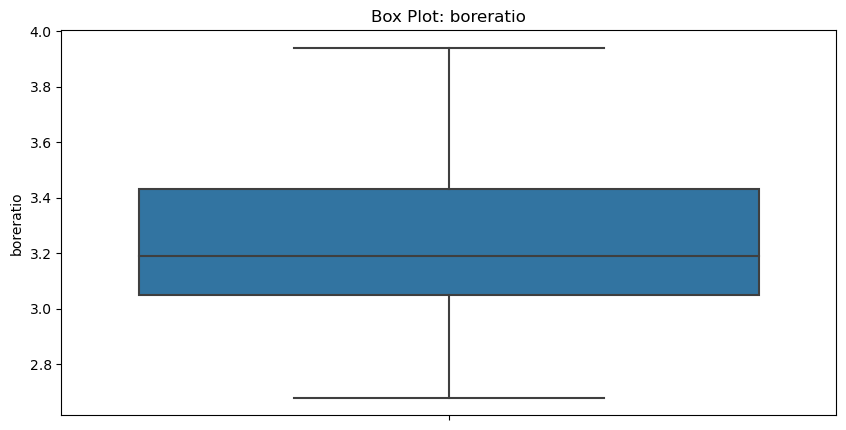

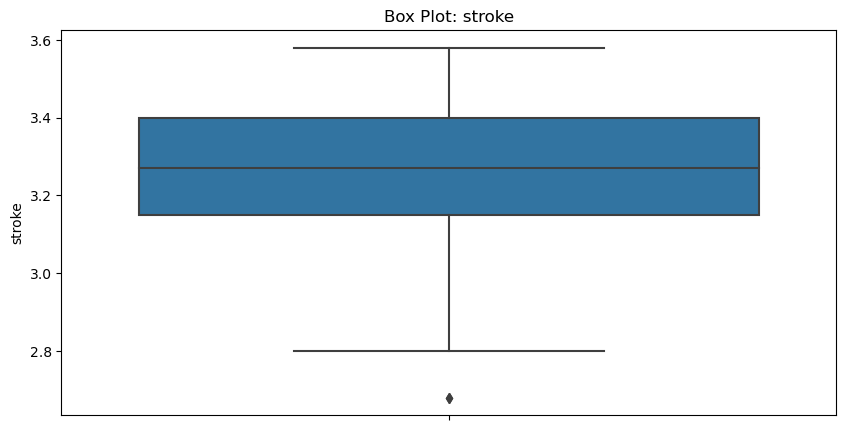

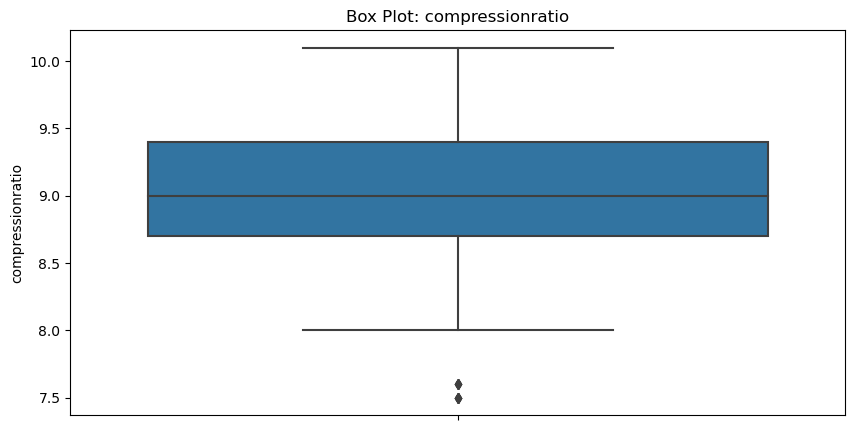

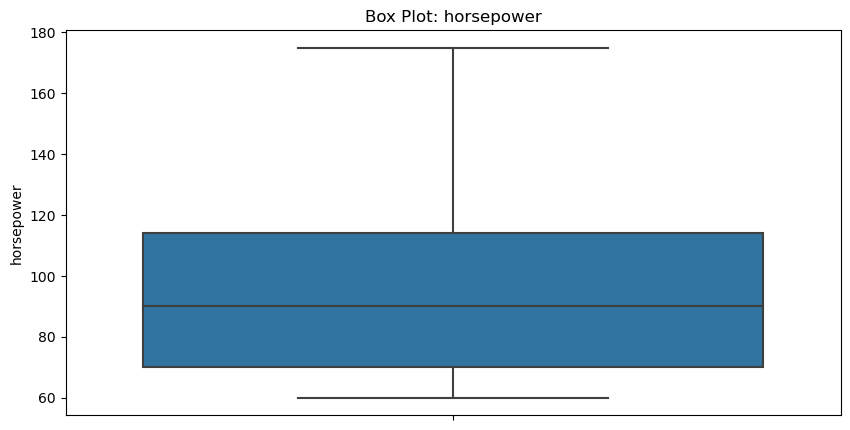

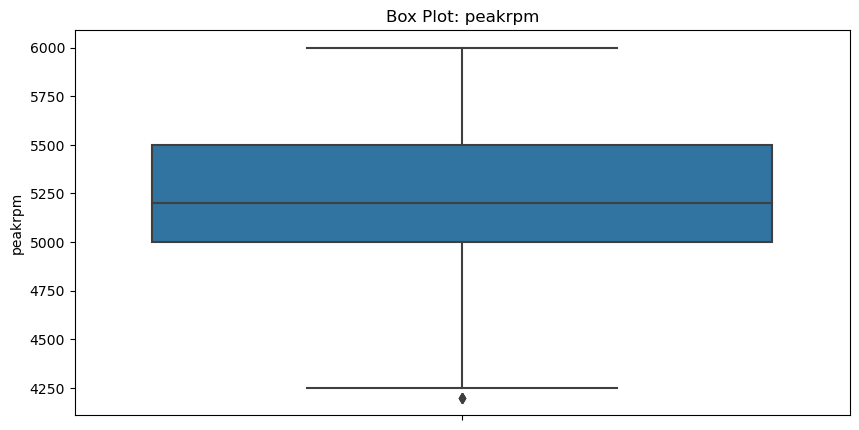

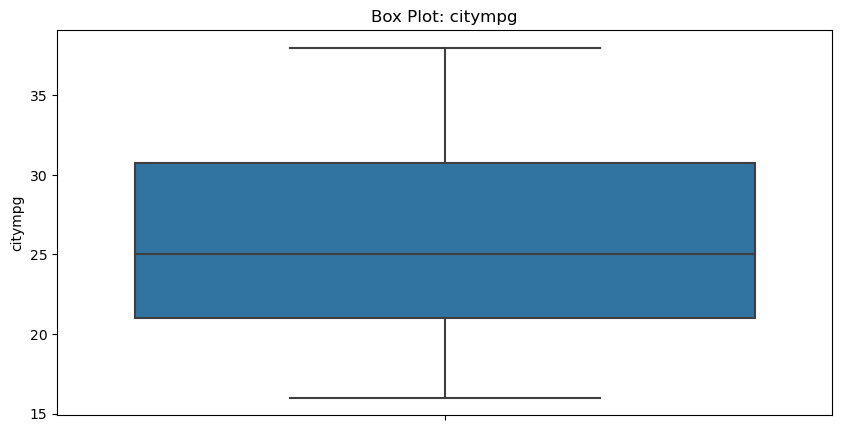

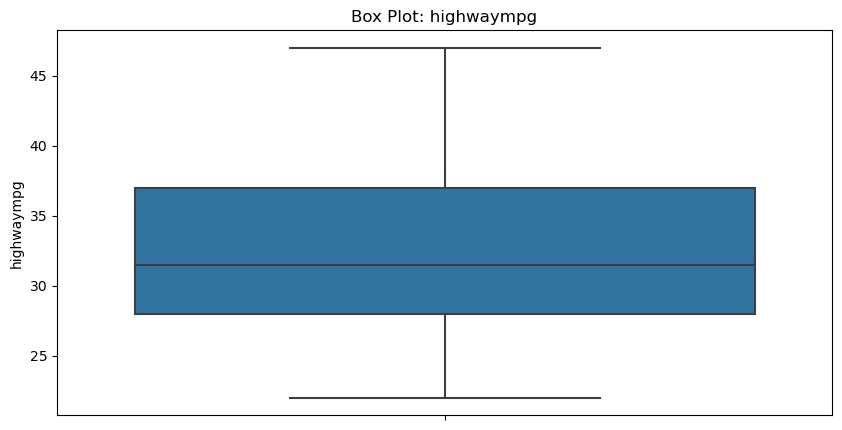

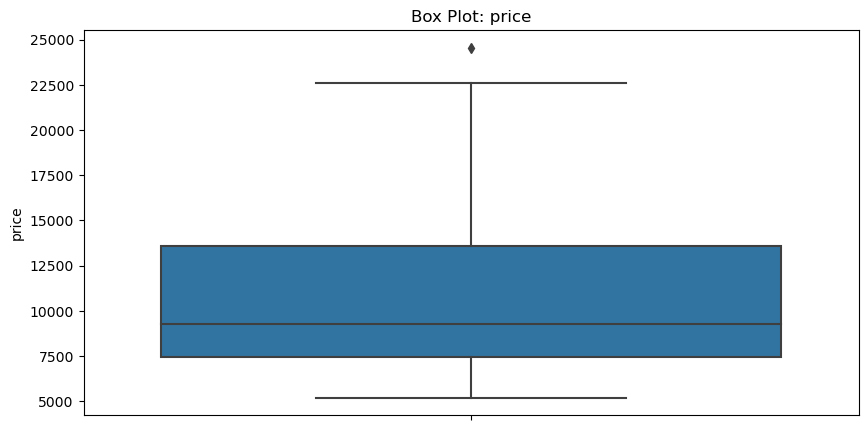

In [28]:
# Plot box plots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=cars, y=column)
    plt.title(f'Box Plot: {column}')
    plt.xticks(rotation=45)
    plt.show()

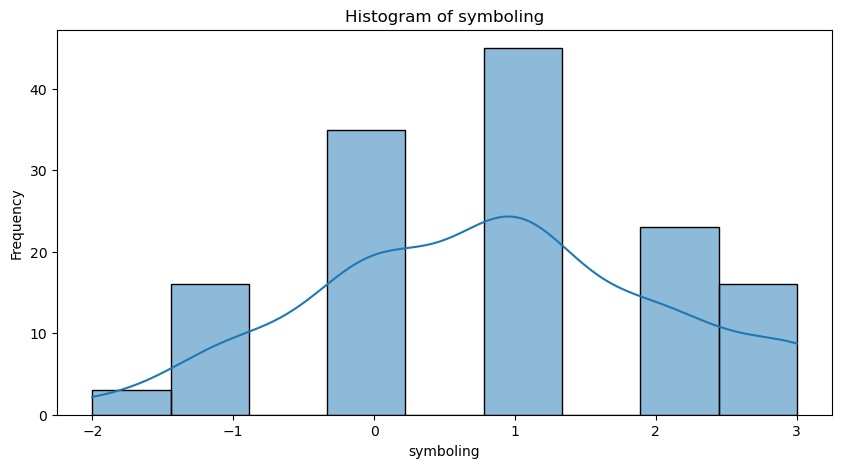

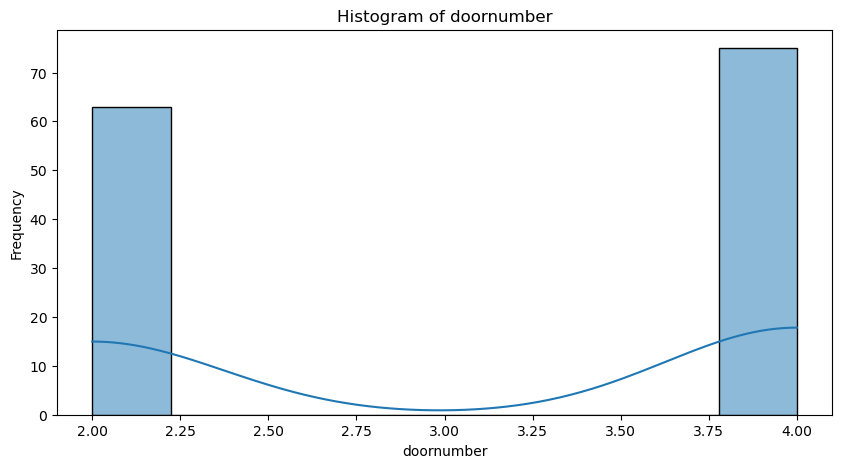

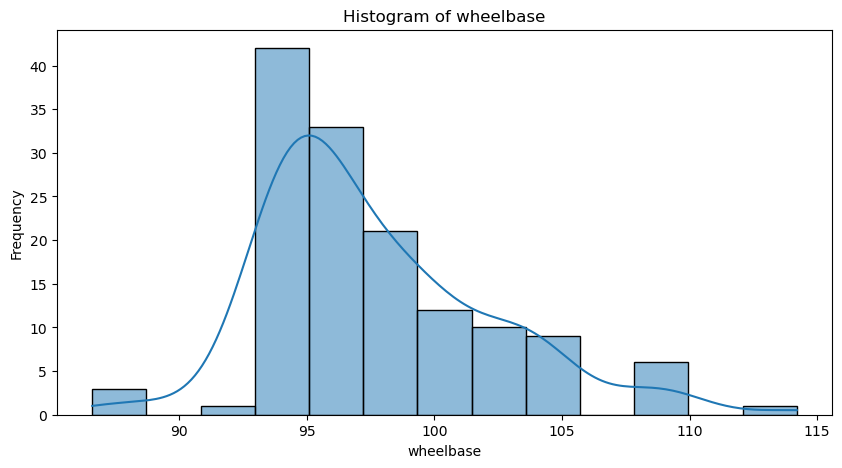

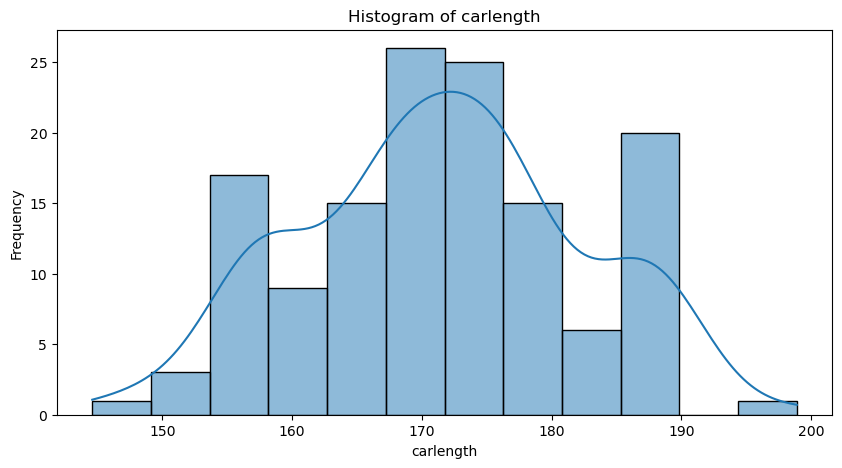

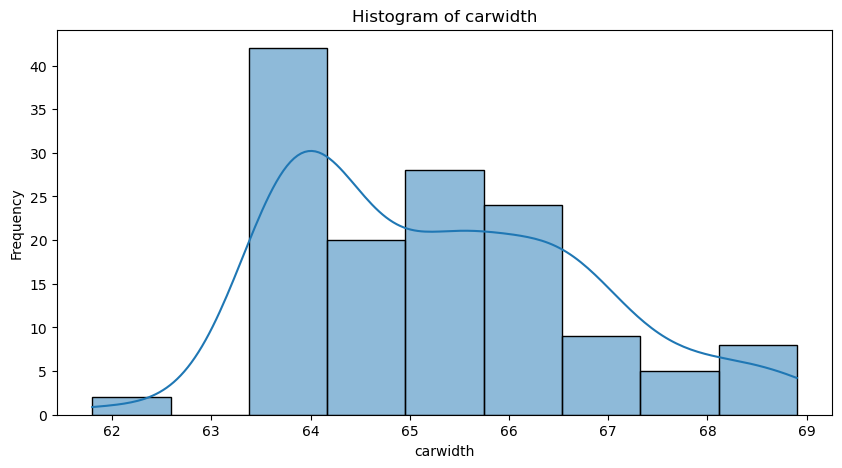

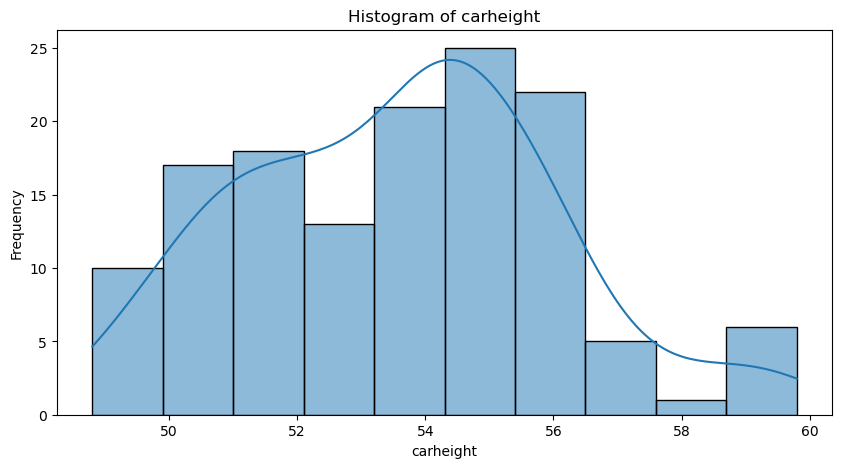

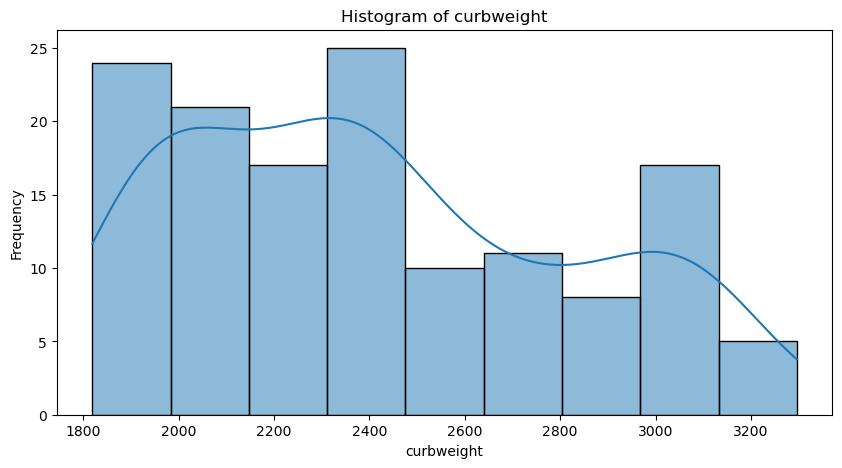

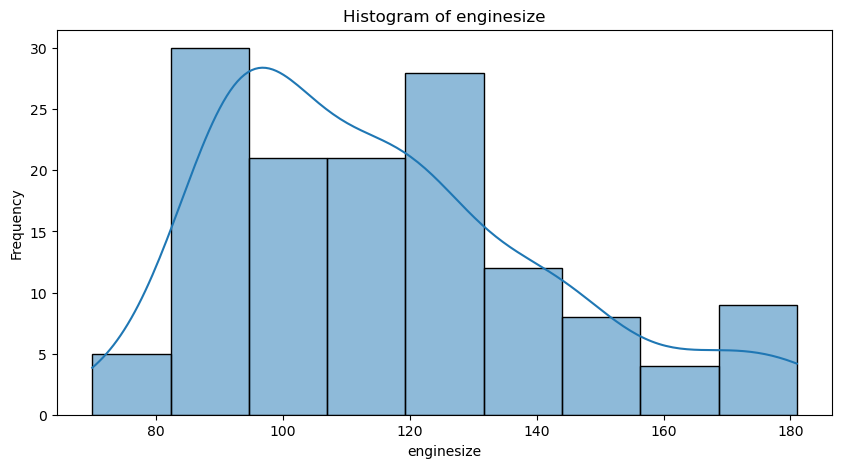

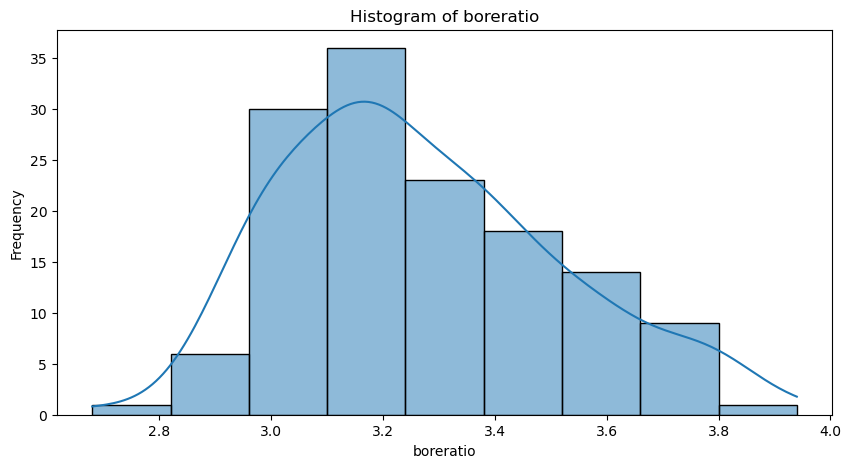

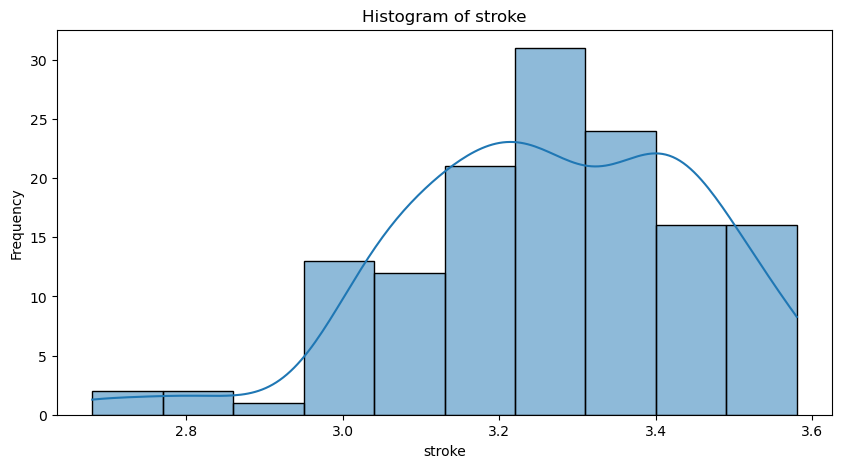

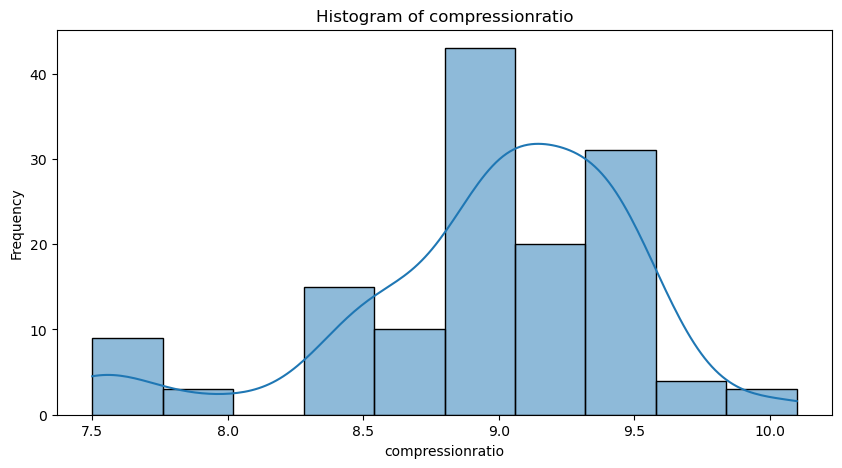

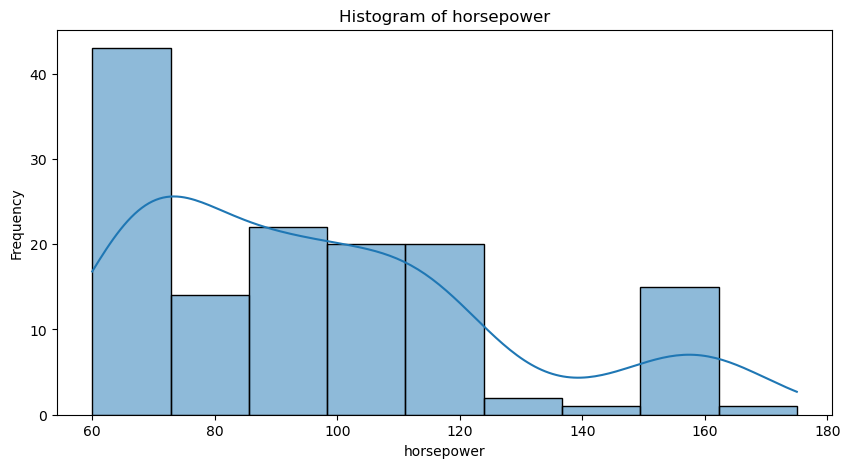

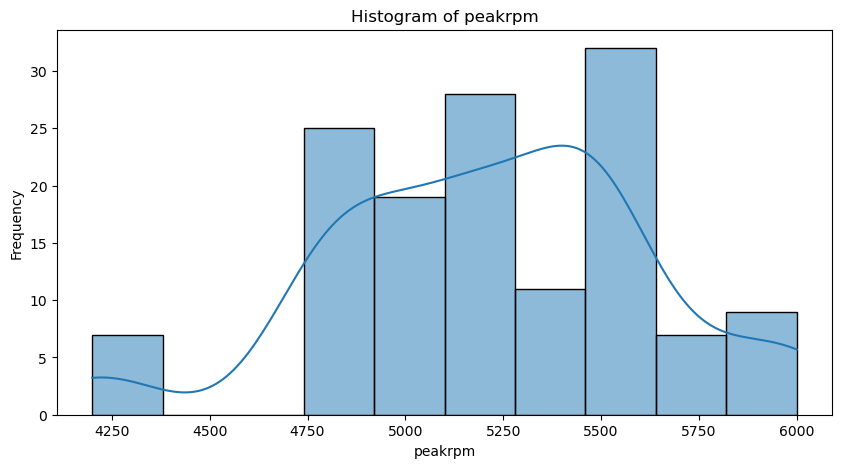

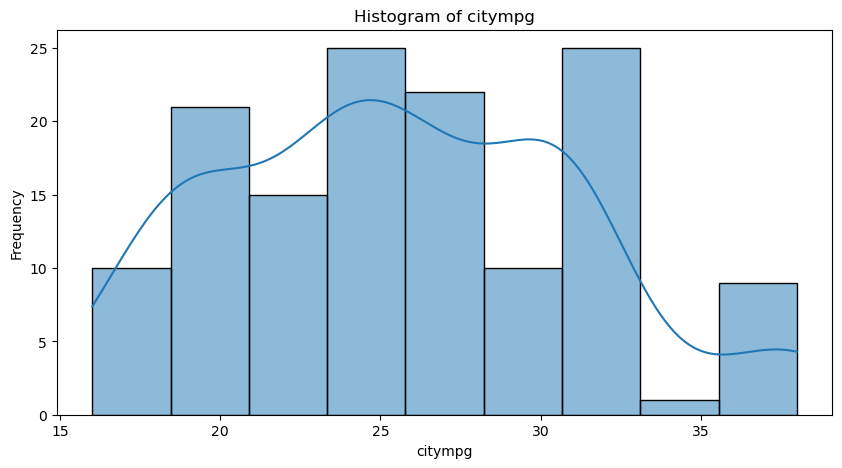

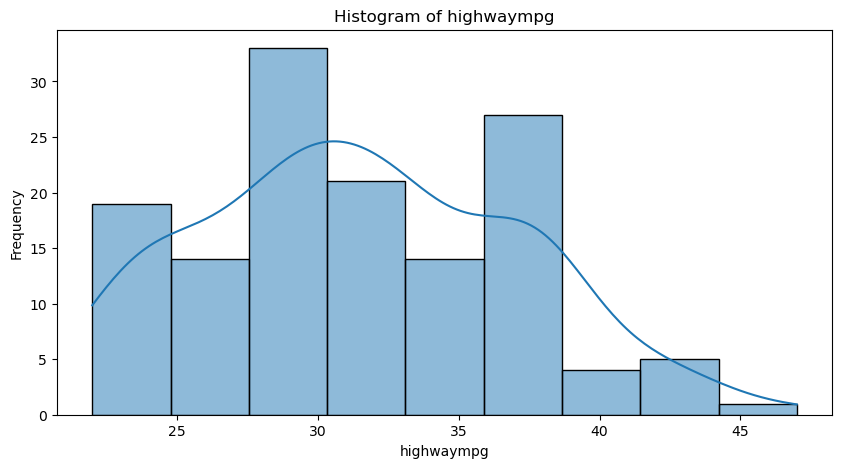

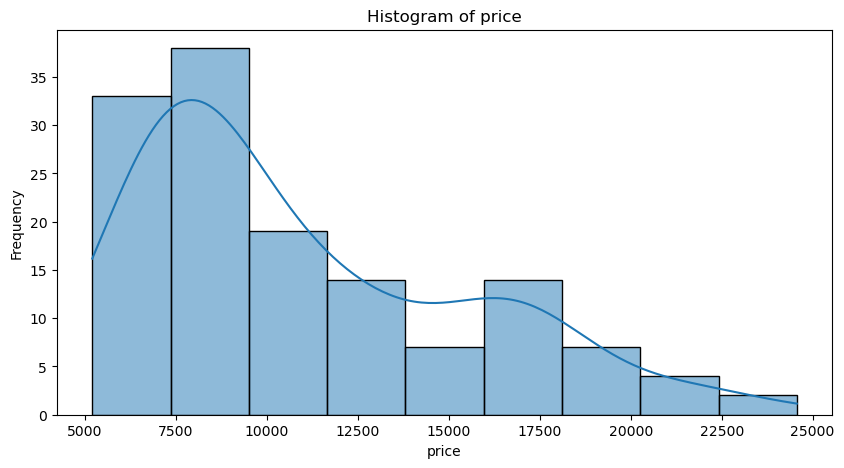

In [29]:
# Histogram for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=cars, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

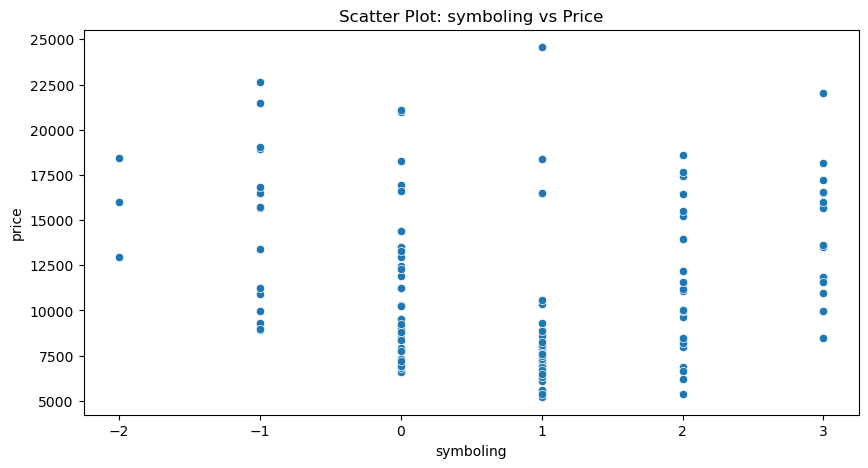

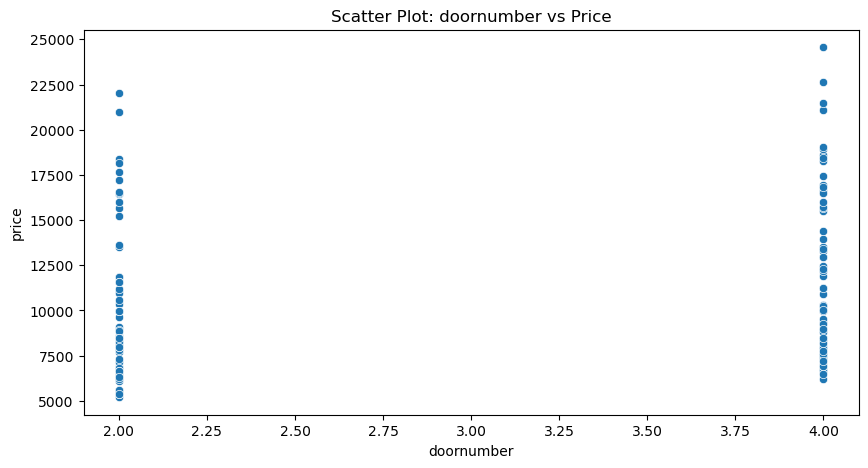

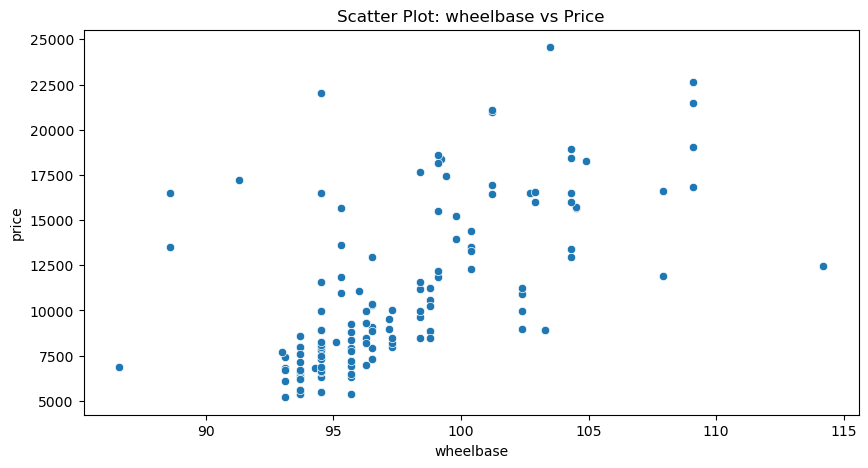

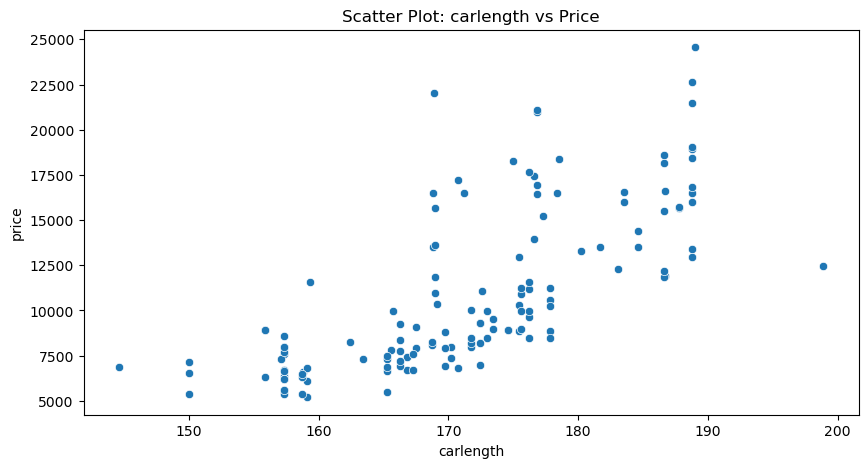

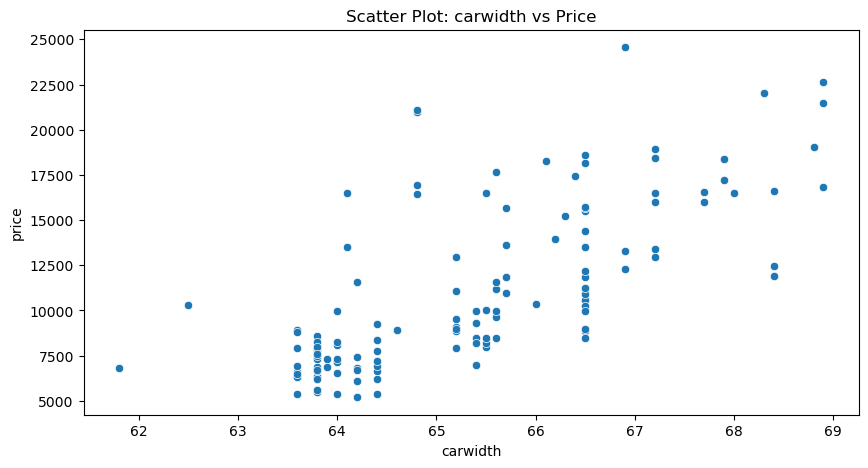

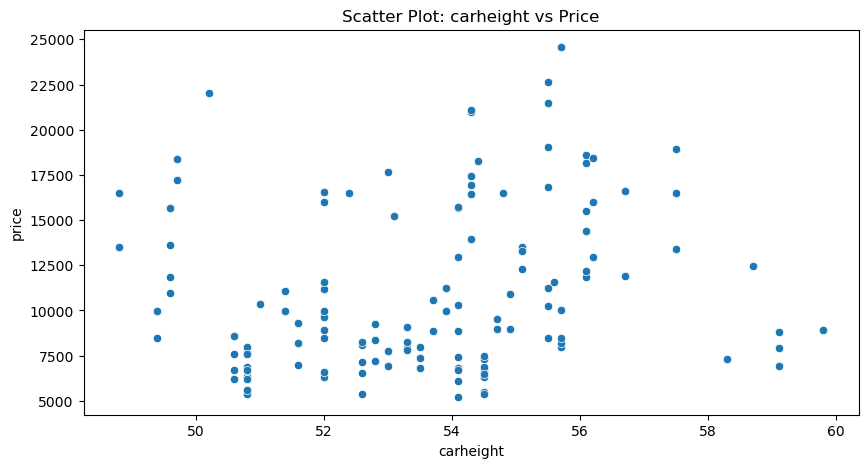

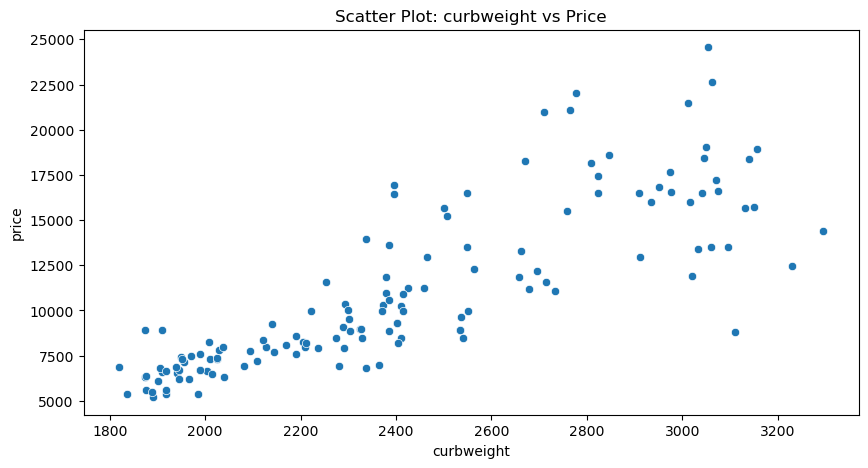

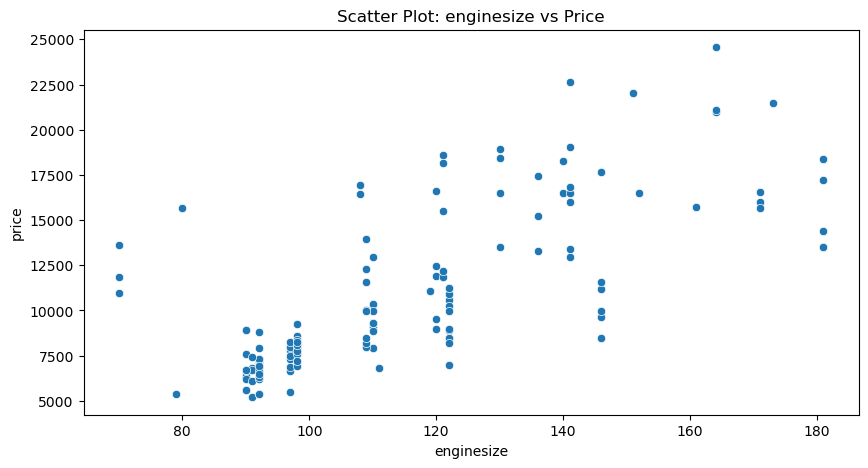

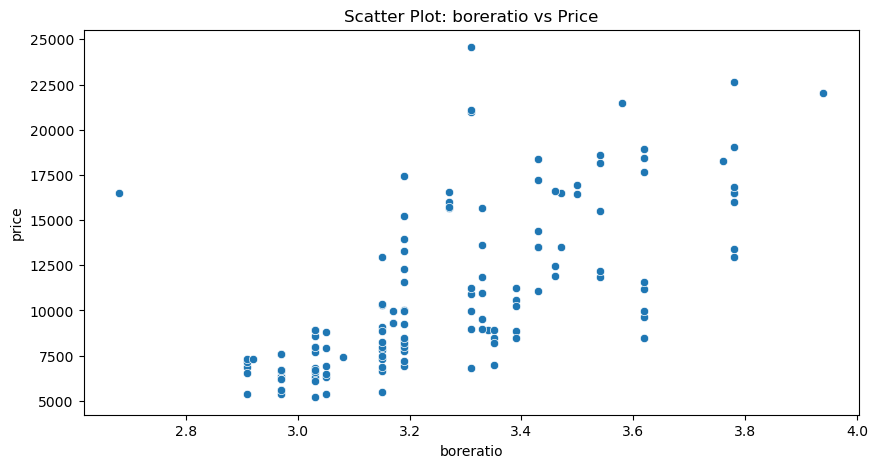

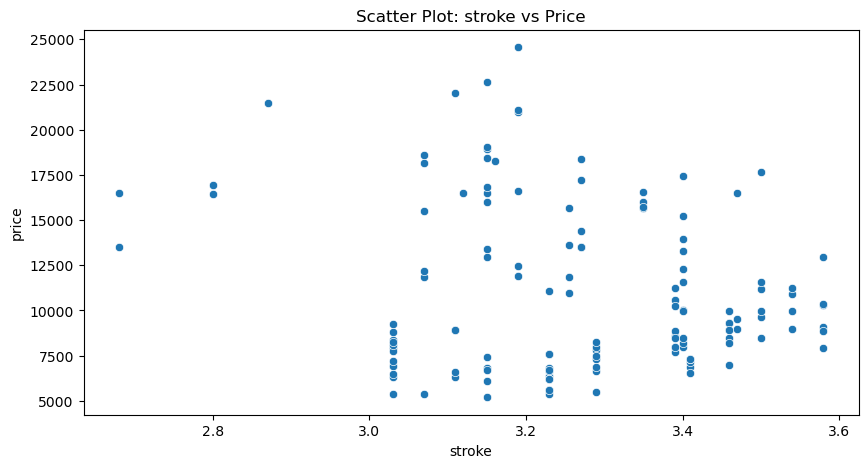

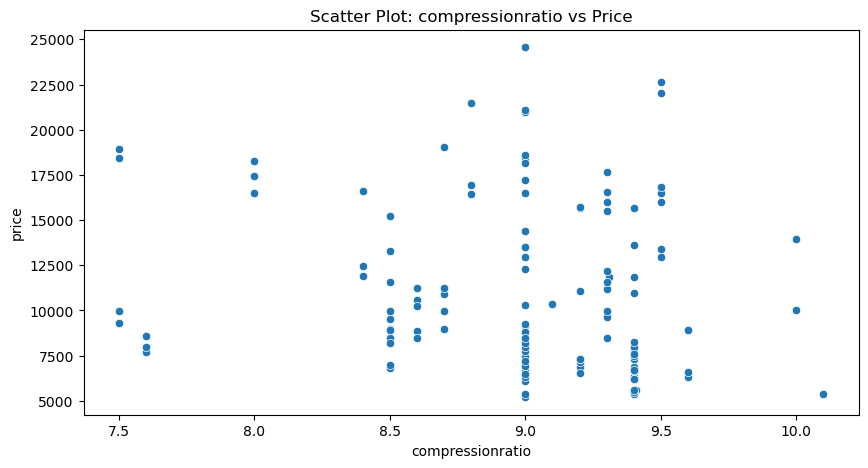

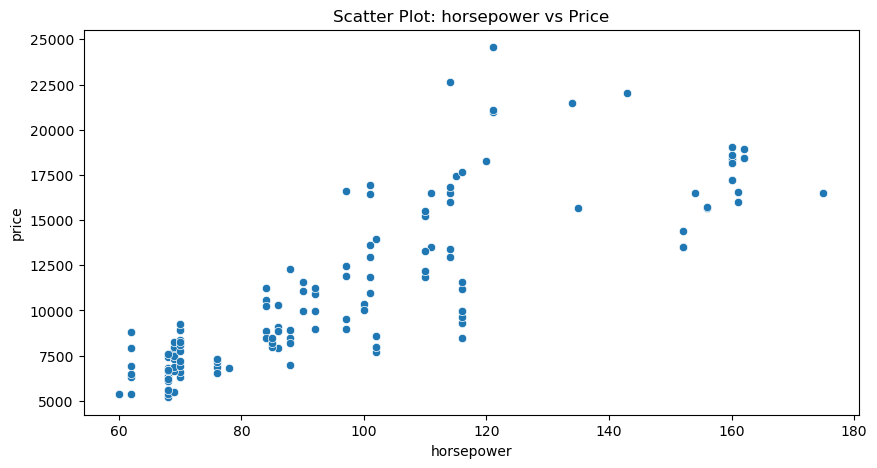

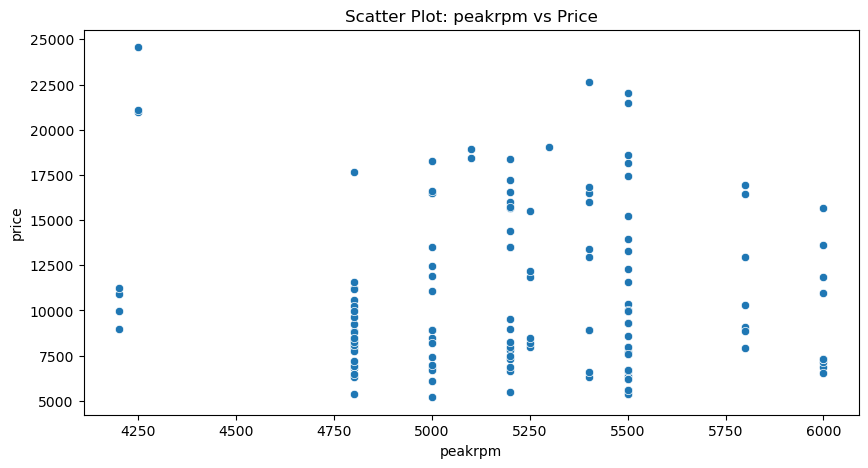

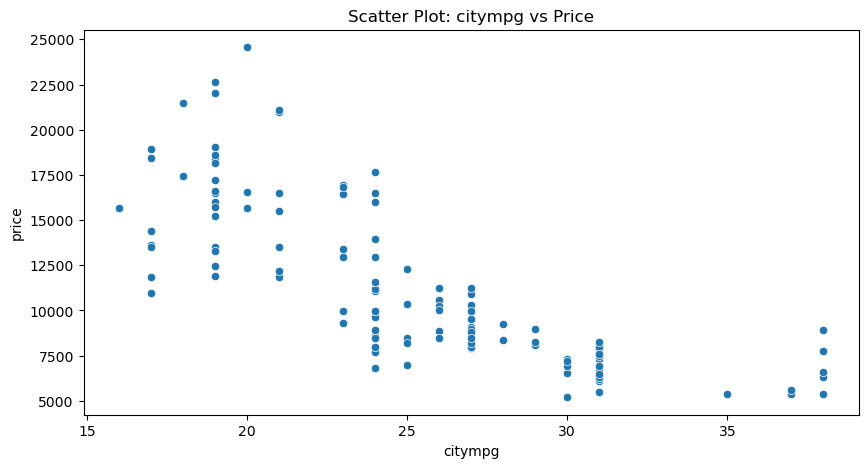

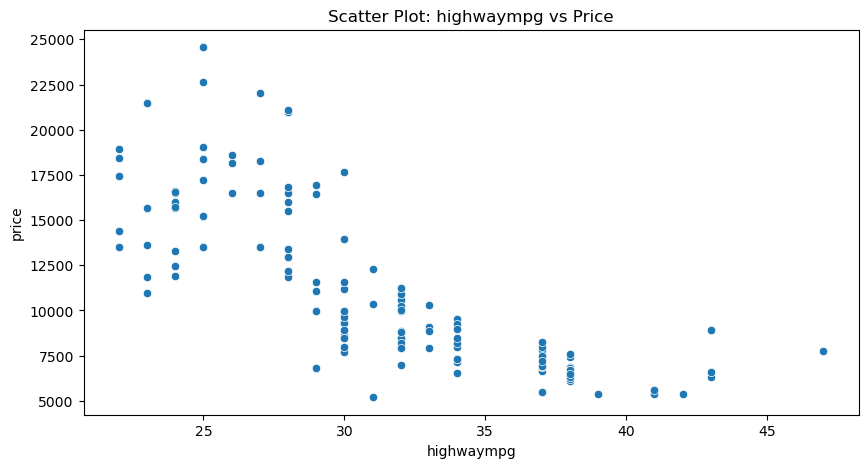

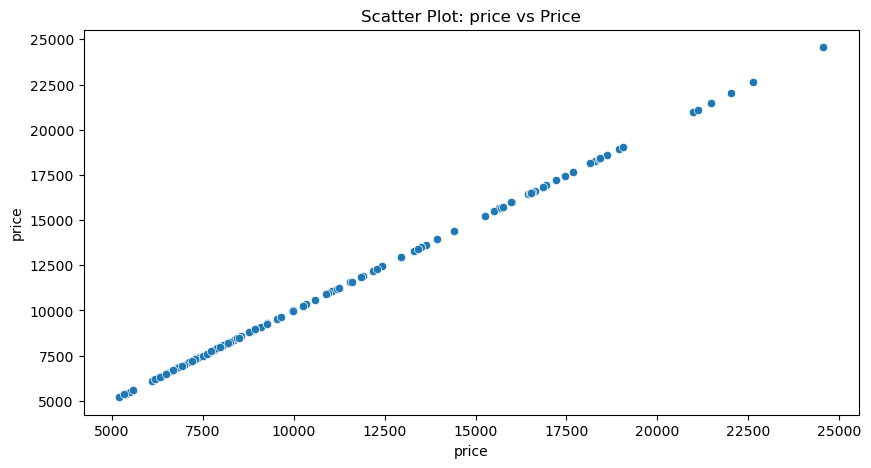

In [30]:
# Scatter plot for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=cars, x=column, y='price')
    plt.title(f'Scatter Plot: {column} vs Price')
    plt.show()

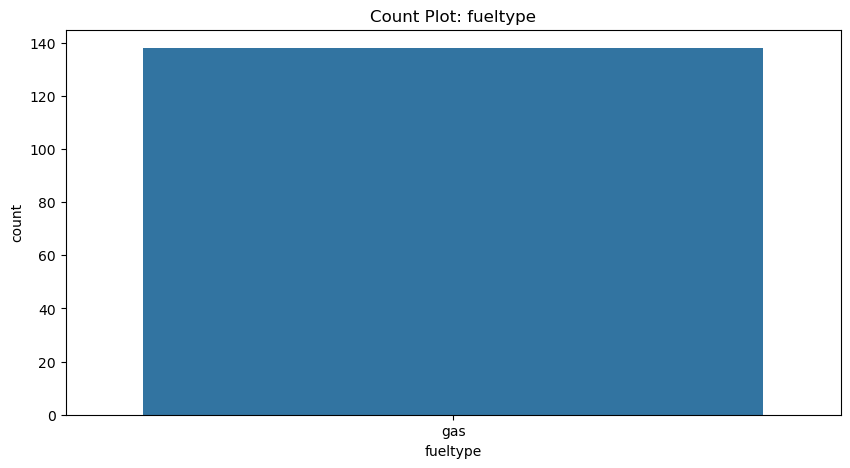

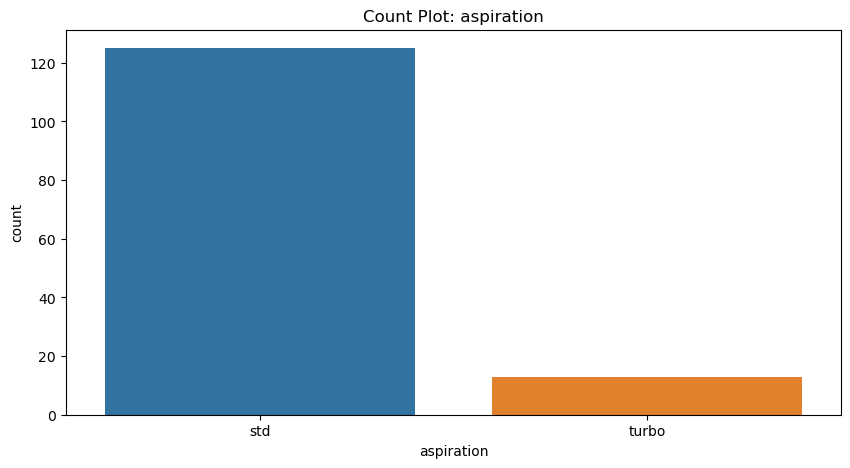

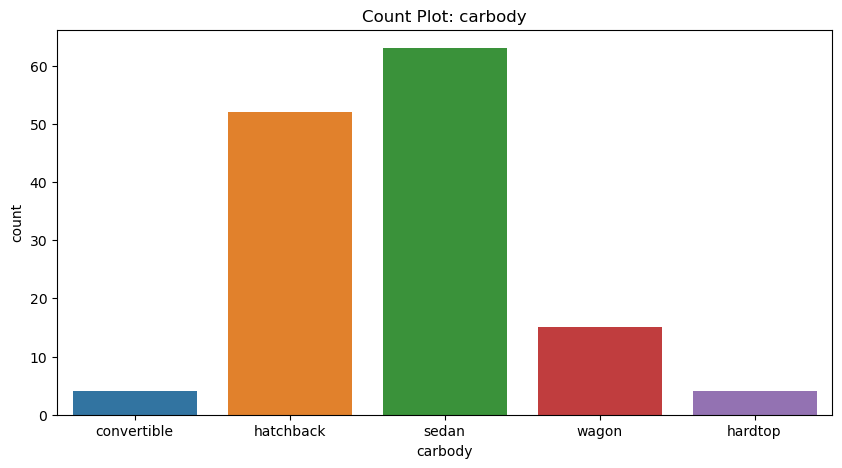

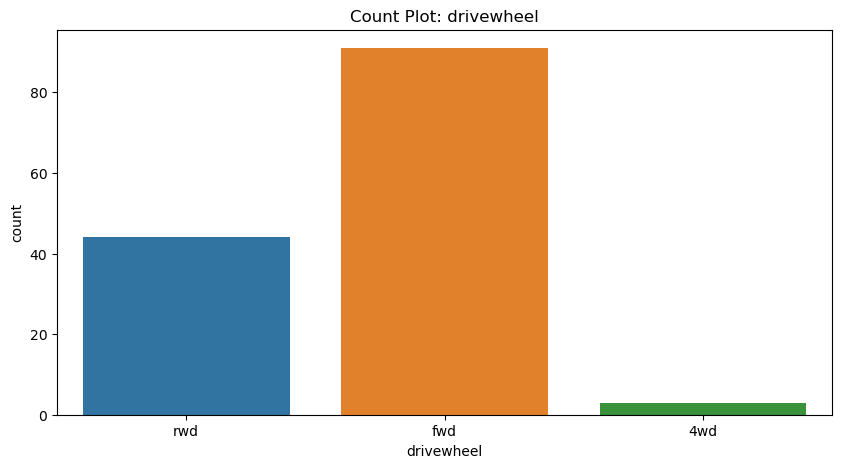

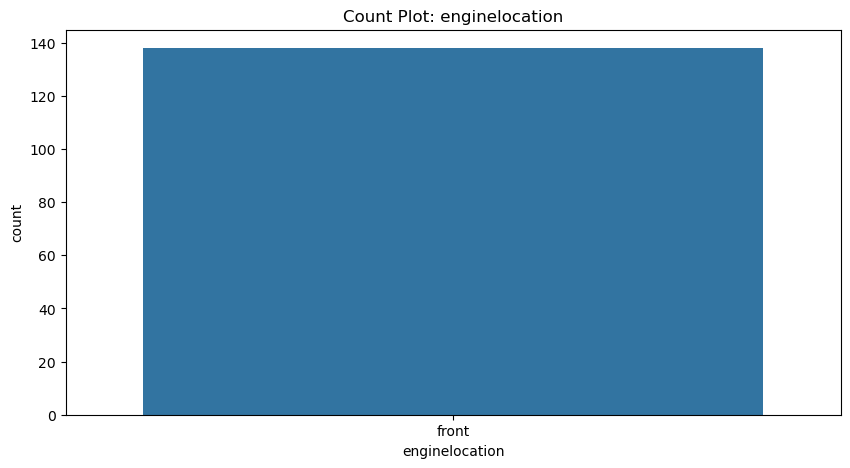

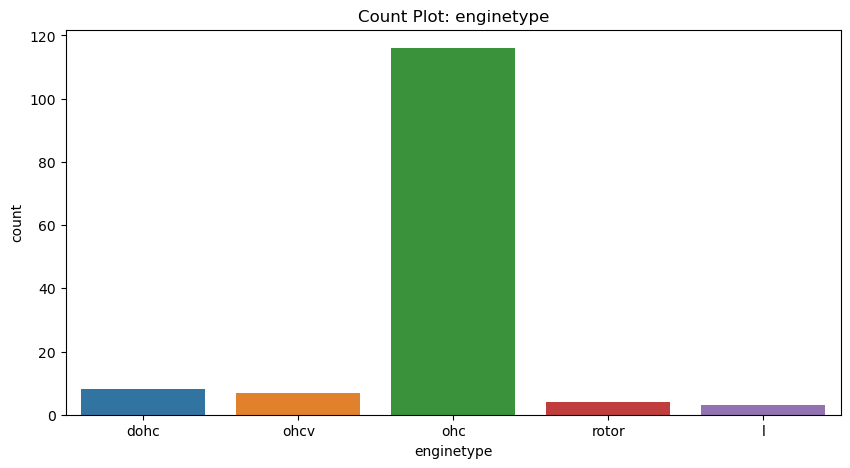

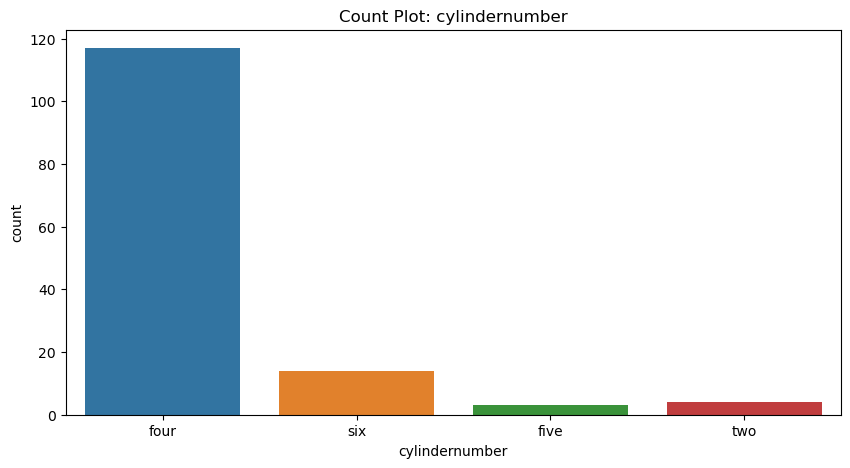

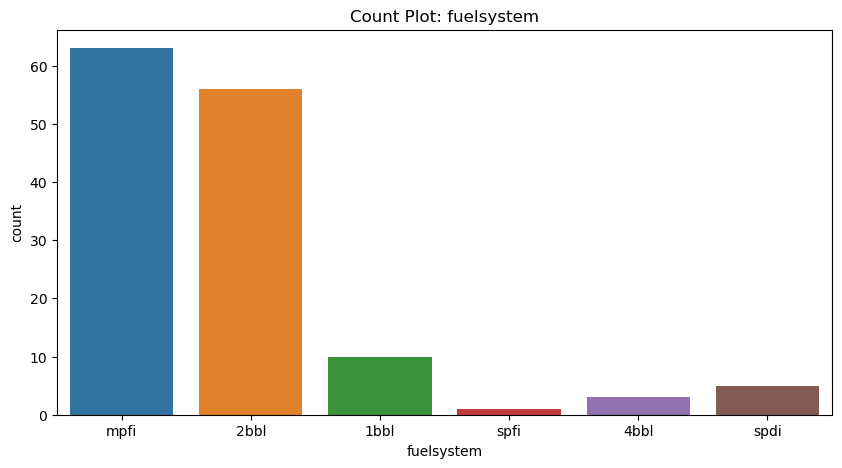

In [31]:
# Count plot for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=cars, x=column)
    plt.title(f'Count Plot: {column}')
    plt.xticks(rotation=0)
    plt.show()

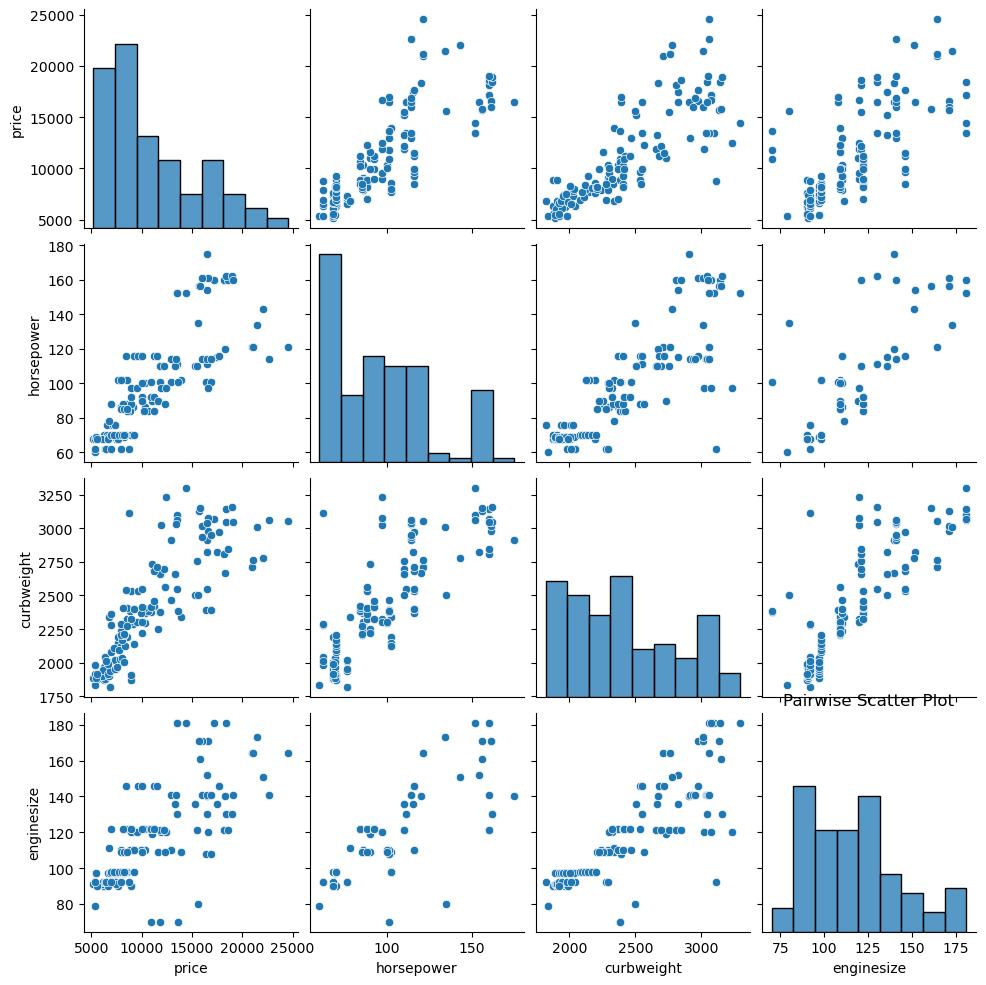

In [32]:
# Pairwise Scatter Plot: Plot pairwise scatter plots for a selection of numerical columns to visualize the relationships between them.
selected_columns = ['price', 'horsepower', 'curbweight', 'enginesize']
sns.pairplot(cars[selected_columns])
plt.title('Pairwise Scatter Plot')
plt.show()

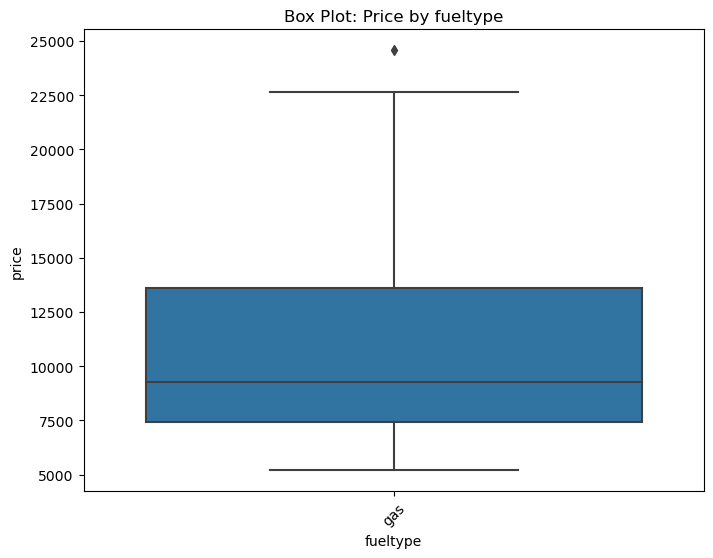

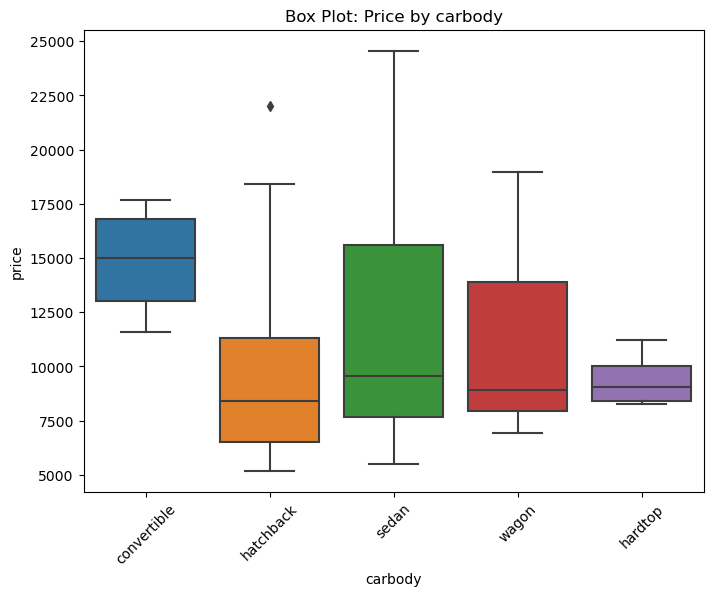

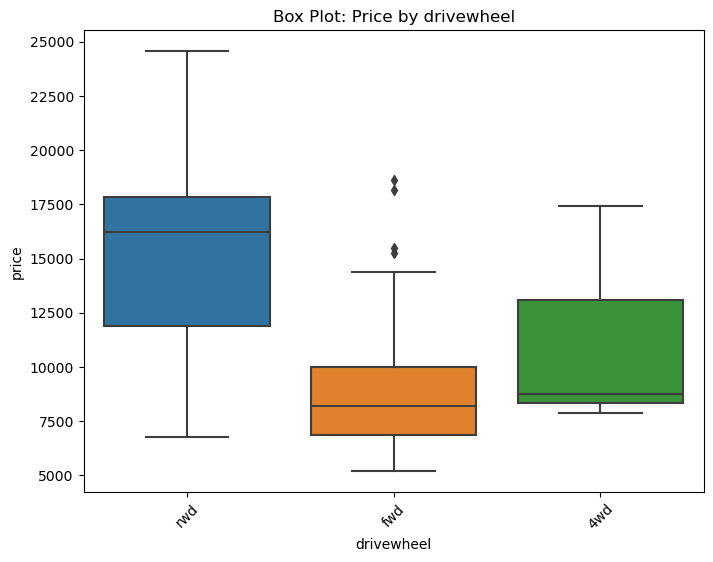

In [33]:
# Box Plot by Categorical Column: Create box plots to compare the distribution of car prices based on different categorical columns.
categorical_columns = ['fueltype', 'carbody', 'drivewheel']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=cars, x=column, y='price')
    plt.title(f'Box Plot: Price by {column}')
    plt.xticks(rotation=45)
    plt.show()

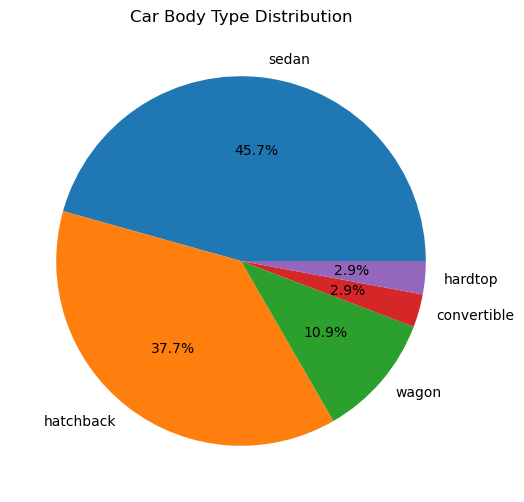

In [34]:
# Pie Chart: Create a pie chart to visualize the distribution of car body types.
carbody_counts = cars['carbody'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(carbody_counts, labels=carbody_counts.index, autopct='%1.1f%%')
plt.title('Car Body Type Distribution')
plt.show()

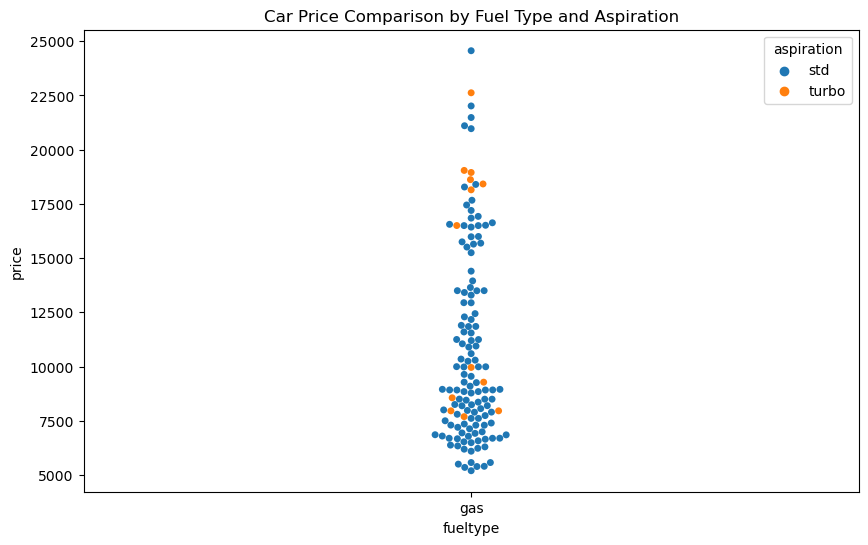

In [35]:
# Swarm Plot: Use a swarm plot to compare the car prices based on the fuel type and aspiration.
plt.figure(figsize=(10, 6))
sns.swarmplot(data=cars, x='fueltype', y='price', hue='aspiration')
plt.title('Car Price Comparison by Fuel Type and Aspiration')
plt.show()

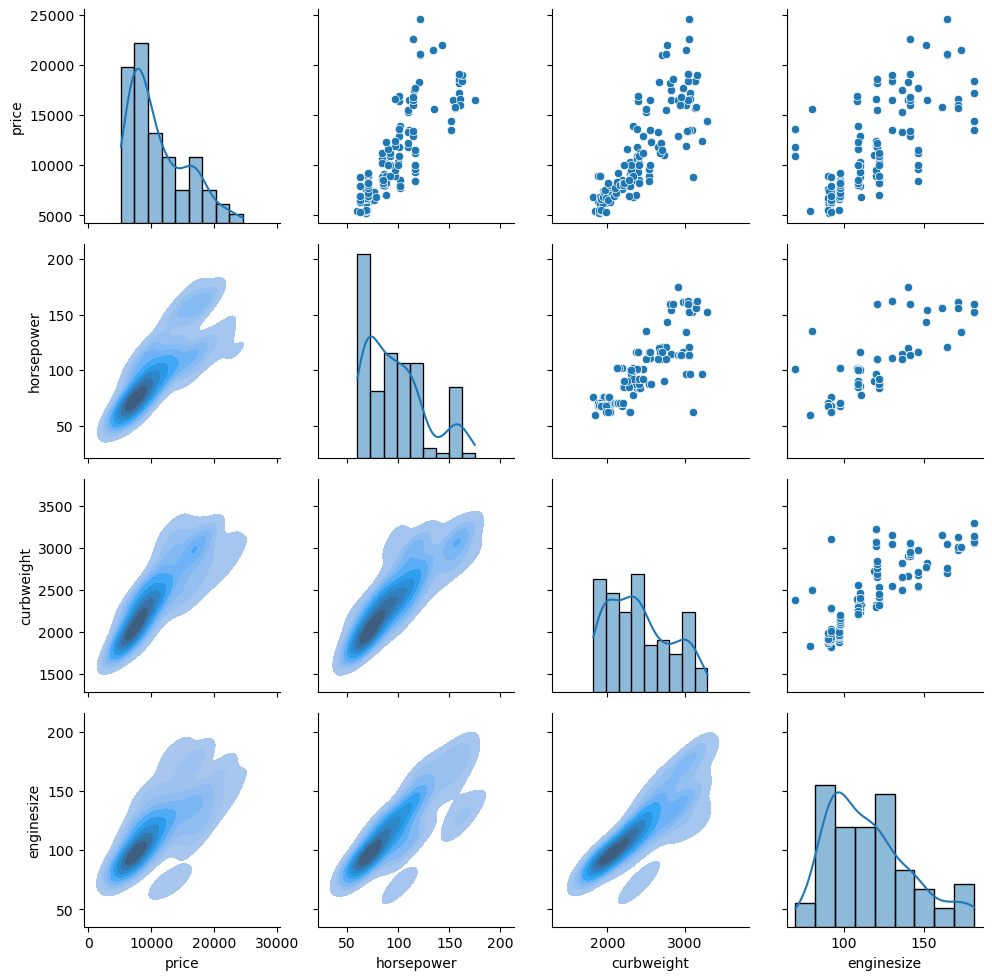

In [36]:
# PairGrid: Use PairGrid to create a grid of scatter plots for pairwise relationships between numerical columns.
selected_columns = ['price', 'horsepower', 'curbweight', 'enginesize']
pairgrid = sns.PairGrid(cars[selected_columns])
pairgrid.map_upper(sns.scatterplot)
pairgrid.map_lower(sns.kdeplot, fill=True)
pairgrid.map_diag(sns.histplot, kde=True)
plt.show()

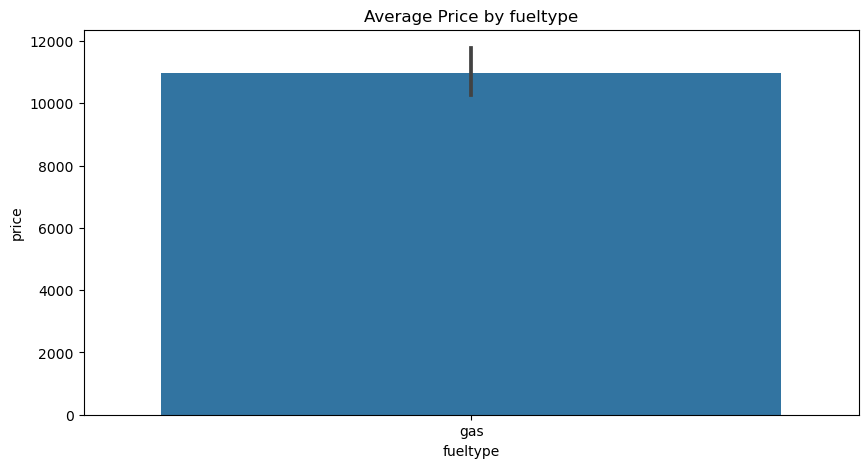

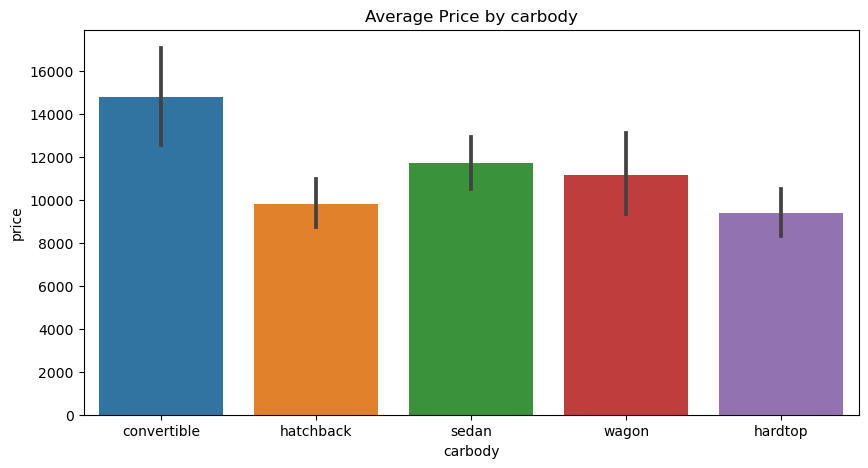

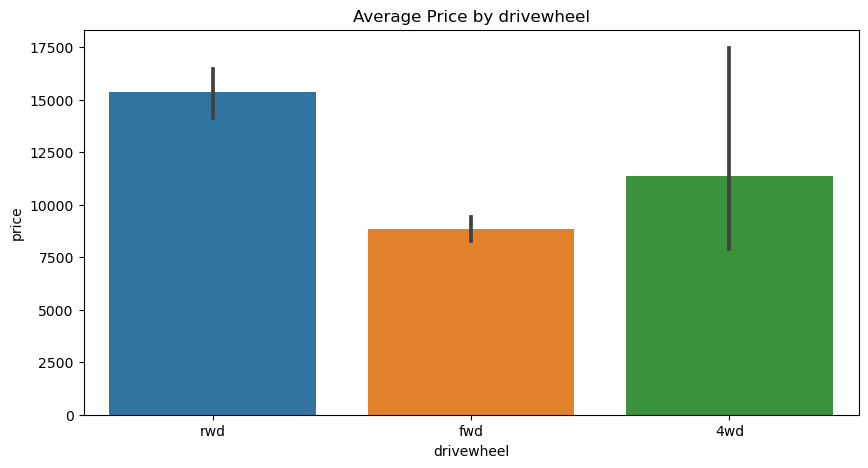

In [37]:
category_columns = ['fueltype', 'carbody', 'drivewheel']
for column in category_columns:
    plt.figure(figsize=(10,5))
    sns.barplot(data=cars, x=column, y='price')
    plt.title(f'Average Price by {column}')
    plt.xticks(rotation=0)
    plt.show()

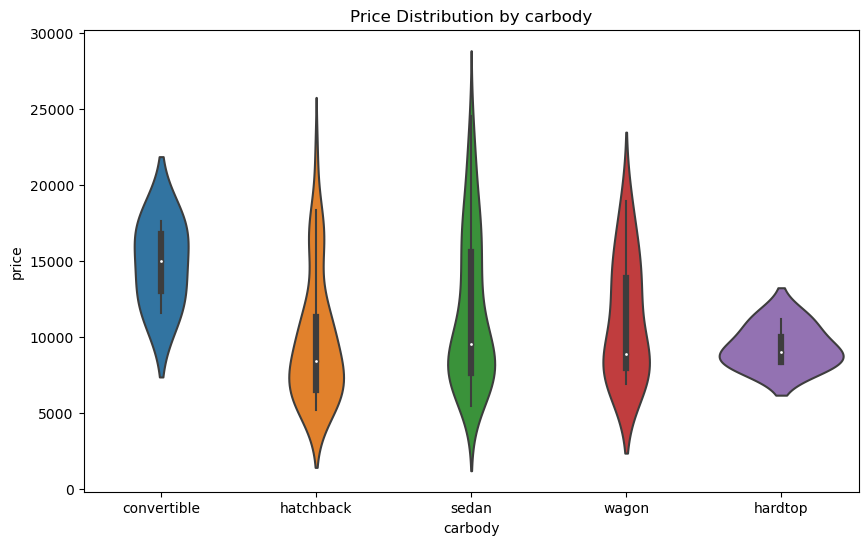

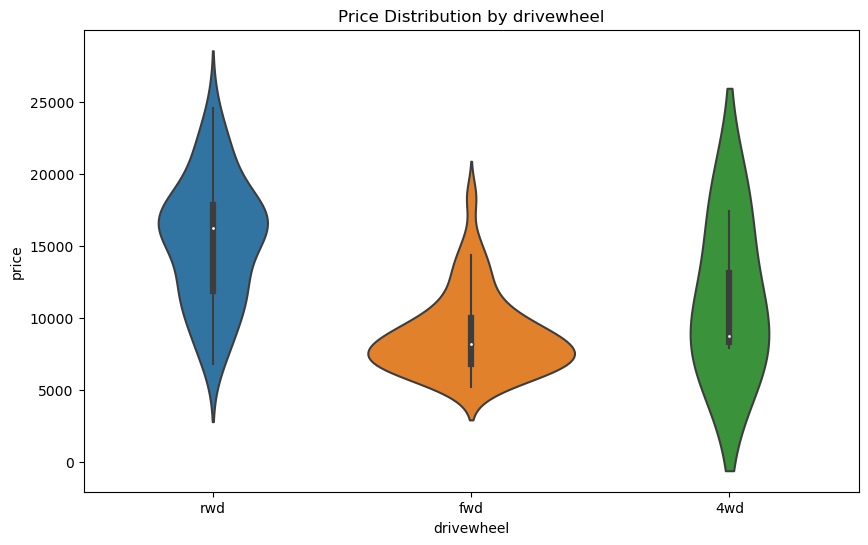

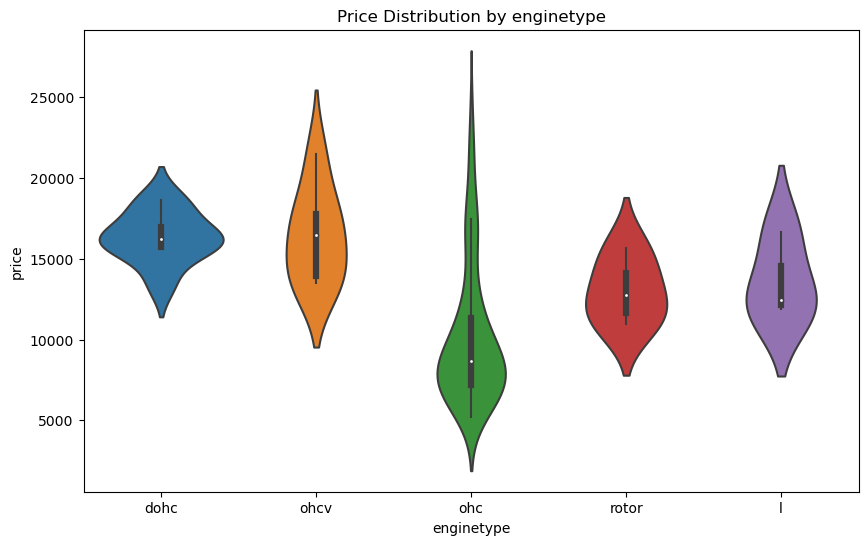

In [38]:
category_columns = ['carbody', 'drivewheel', 'enginetype']
for column in category_columns:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=cars, x=column, y='price')
    plt.title(f'Price Distribution by {column}')
    plt.xticks(rotation=0)
    plt.show()

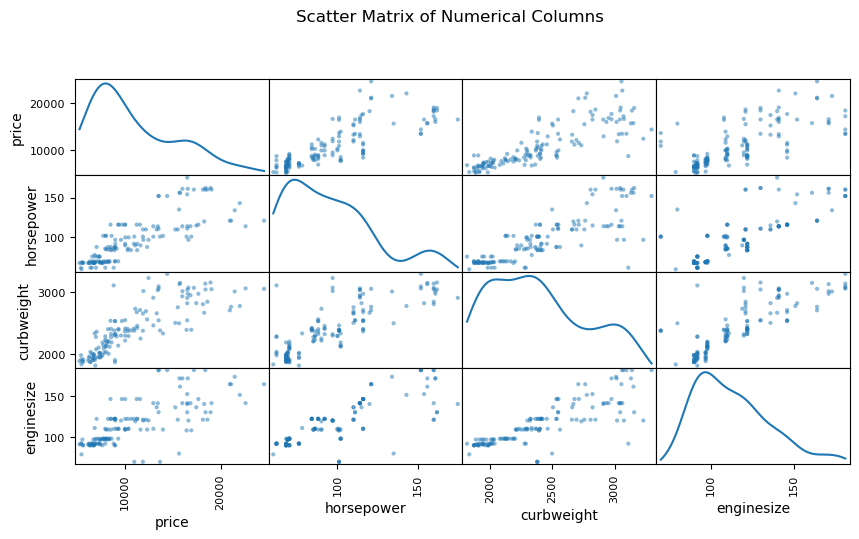

In [39]:
from pandas.plotting import scatter_matrix
selected_columns = ['price', 'horsepower', 'curbweight', 'enginesize']
scatter_matrix(cars[selected_columns], figsize=(10,5), diagonal='kde')
plt.suptitle('Scatter Matrix of Numerical Columns', y=1.02)
plt.show()

In [40]:
cars.corr()

symboling  doornumber  wheelbase  carlength  carwidth  \
symboling          1.000000   -0.632252  -0.506601  -0.291210 -0.165826   
doornumber        -0.632252    1.000000   0.414396   0.397413  0.182839   
wheelbase         -0.506601    0.414396   1.000000   0.829899  0.779125   
carlength         -0.291210    0.397413   0.829899   1.000000  0.800958   
carwidth          -0.165826    0.182839   0.779125   0.800958  1.000000   
carheight         -0.539457    0.531234   0.583819   0.492090  0.263555   
curbweight        -0.199527    0.231963   0.737434   0.867647  0.804056   
enginesize        -0.159218    0.119052   0.577404   0.701971  0.680806   
boreratio         -0.127671    0.139203   0.643248   0.765336  0.723043   
stroke            -0.023594   -0.032451   0.026645  -0.010004  0.063409   
compressionratio   0.185269   -0.090871  -0.175808  -0.159091 -0.134796   
horsepower         0.014733   -0.003459   0.512434   0.665403  0.715504   
peakrpm            0.237943   -0.163327  -0.225760  -0.252085 -0.096222   
citympg           -0.058121   -0.067607  -0.540769  -0.720913 -0.697306   
highwaympg        -0.008470   -0.060293  -0.575483  -0.722350 -0.705484   
price             -0.061679    0.121461   0.616900   0.714122  0.728848   

                  carheight  curbweight  enginesize  boreratio    stroke  \
symboling         -0.539457   -0.199527   -0.159218  -0.127671 -0.023594   
doornumber         0.531234    0.231963    0.119052   0.139203 -0.032451   
wheelbase          0.583819    0.737434    0.577404   0.643248  0.026645   
carlength          0.492090    0.867647    0.701971   0.765336 -0.010004   
carwidth           0.263555    0.804056    0.680806   0.723043  0.063409   
carheight          1.000000    0.346793    0.186003   0.263126 -0.068079   
curbweight         0.346793    1.000000    0.821767   0.731756 -0.033754   
enginesize         0.186003    0.821767    1.000000   0.621375  0.107280   
boreratio          0.263126    0.731756    0.621375   1.000000 -0.146837   
stroke            -0.068079   -0.033754    0.107280  -0.146837  1.000000   
compressionratio  -0.076733   -0.198227   -0.124476  -0.090332 -0.185347   
horsepower         0.048432    0.826401    0.792568   0.618390  0.049142   
peakrpm           -0.251611   -0.185752   -0.324919  -0.210915  0.067969   
citympg           -0.138556   -0.831359   -0.644210  -0.636967 -0.050922   
highwaympg        -0.176934   -0.846479   -0.651818  -0.622376 -0.054568   
price              0.180739    0.825711    0.719850   0.676590 -0.185064   

                  compressionratio  horsepower   peakrpm   citympg  \
symboling                 0.185269    0.014733  0.237943 -0.058121   
doornumber               -0.090871   -0.003459 -0.163327 -0.067607   
wheelbase                -0.175808    0.512434 -0.225760 -0.540769   
carlength                -0.159091    0.665403 -0.252085 -0.720913   
carwidth                 -0.134796    0.715504 -0.096222 -0.697306   
carheight                -0.076733    0.048432 -0.251611 -0.138556   
curbweight               -0.198227    0.826401 -0.185752 -0.831359   
enginesize               -0.124476    0.792568 -0.324919 -0.644210   
boreratio                -0.090332    0.618390 -0.210915 -0.636967   
stroke                   -0.185347    0.049142  0.067969 -0.050922   
compressionratio          1.000000   -0.253041  0.148861  0.367375   
horsepower               -0.253041    1.000000  0.011304 -0.824276   
peakrpm                   0.148861    0.011304  1.000000 -0.018674   
citympg                   0.367375   -0.824276 -0.018674  1.000000   
highwaympg                0.346818   -0.820379 -0.030930  0.980393   
price                    -0.113754    0.809292 -0.066943 -0.783333   

                  highwaympg     price  
symboling          -0.008470 -0.061679  
doornumber         -0.060293  0.121461  
wheelbase          -0.575483  0.616900  
carlength          -0.722350  0.714122  
carwidth           -0.705484  0.728848  
carheight   

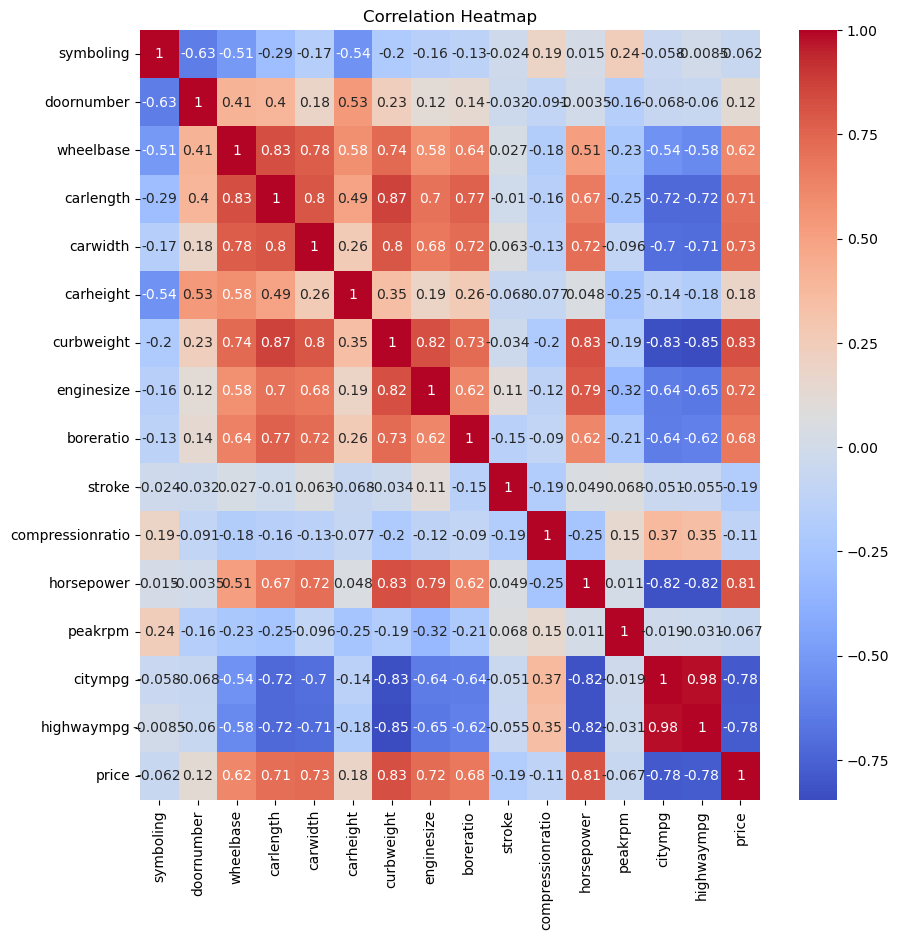

In [41]:
correlation_matrix = cars[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

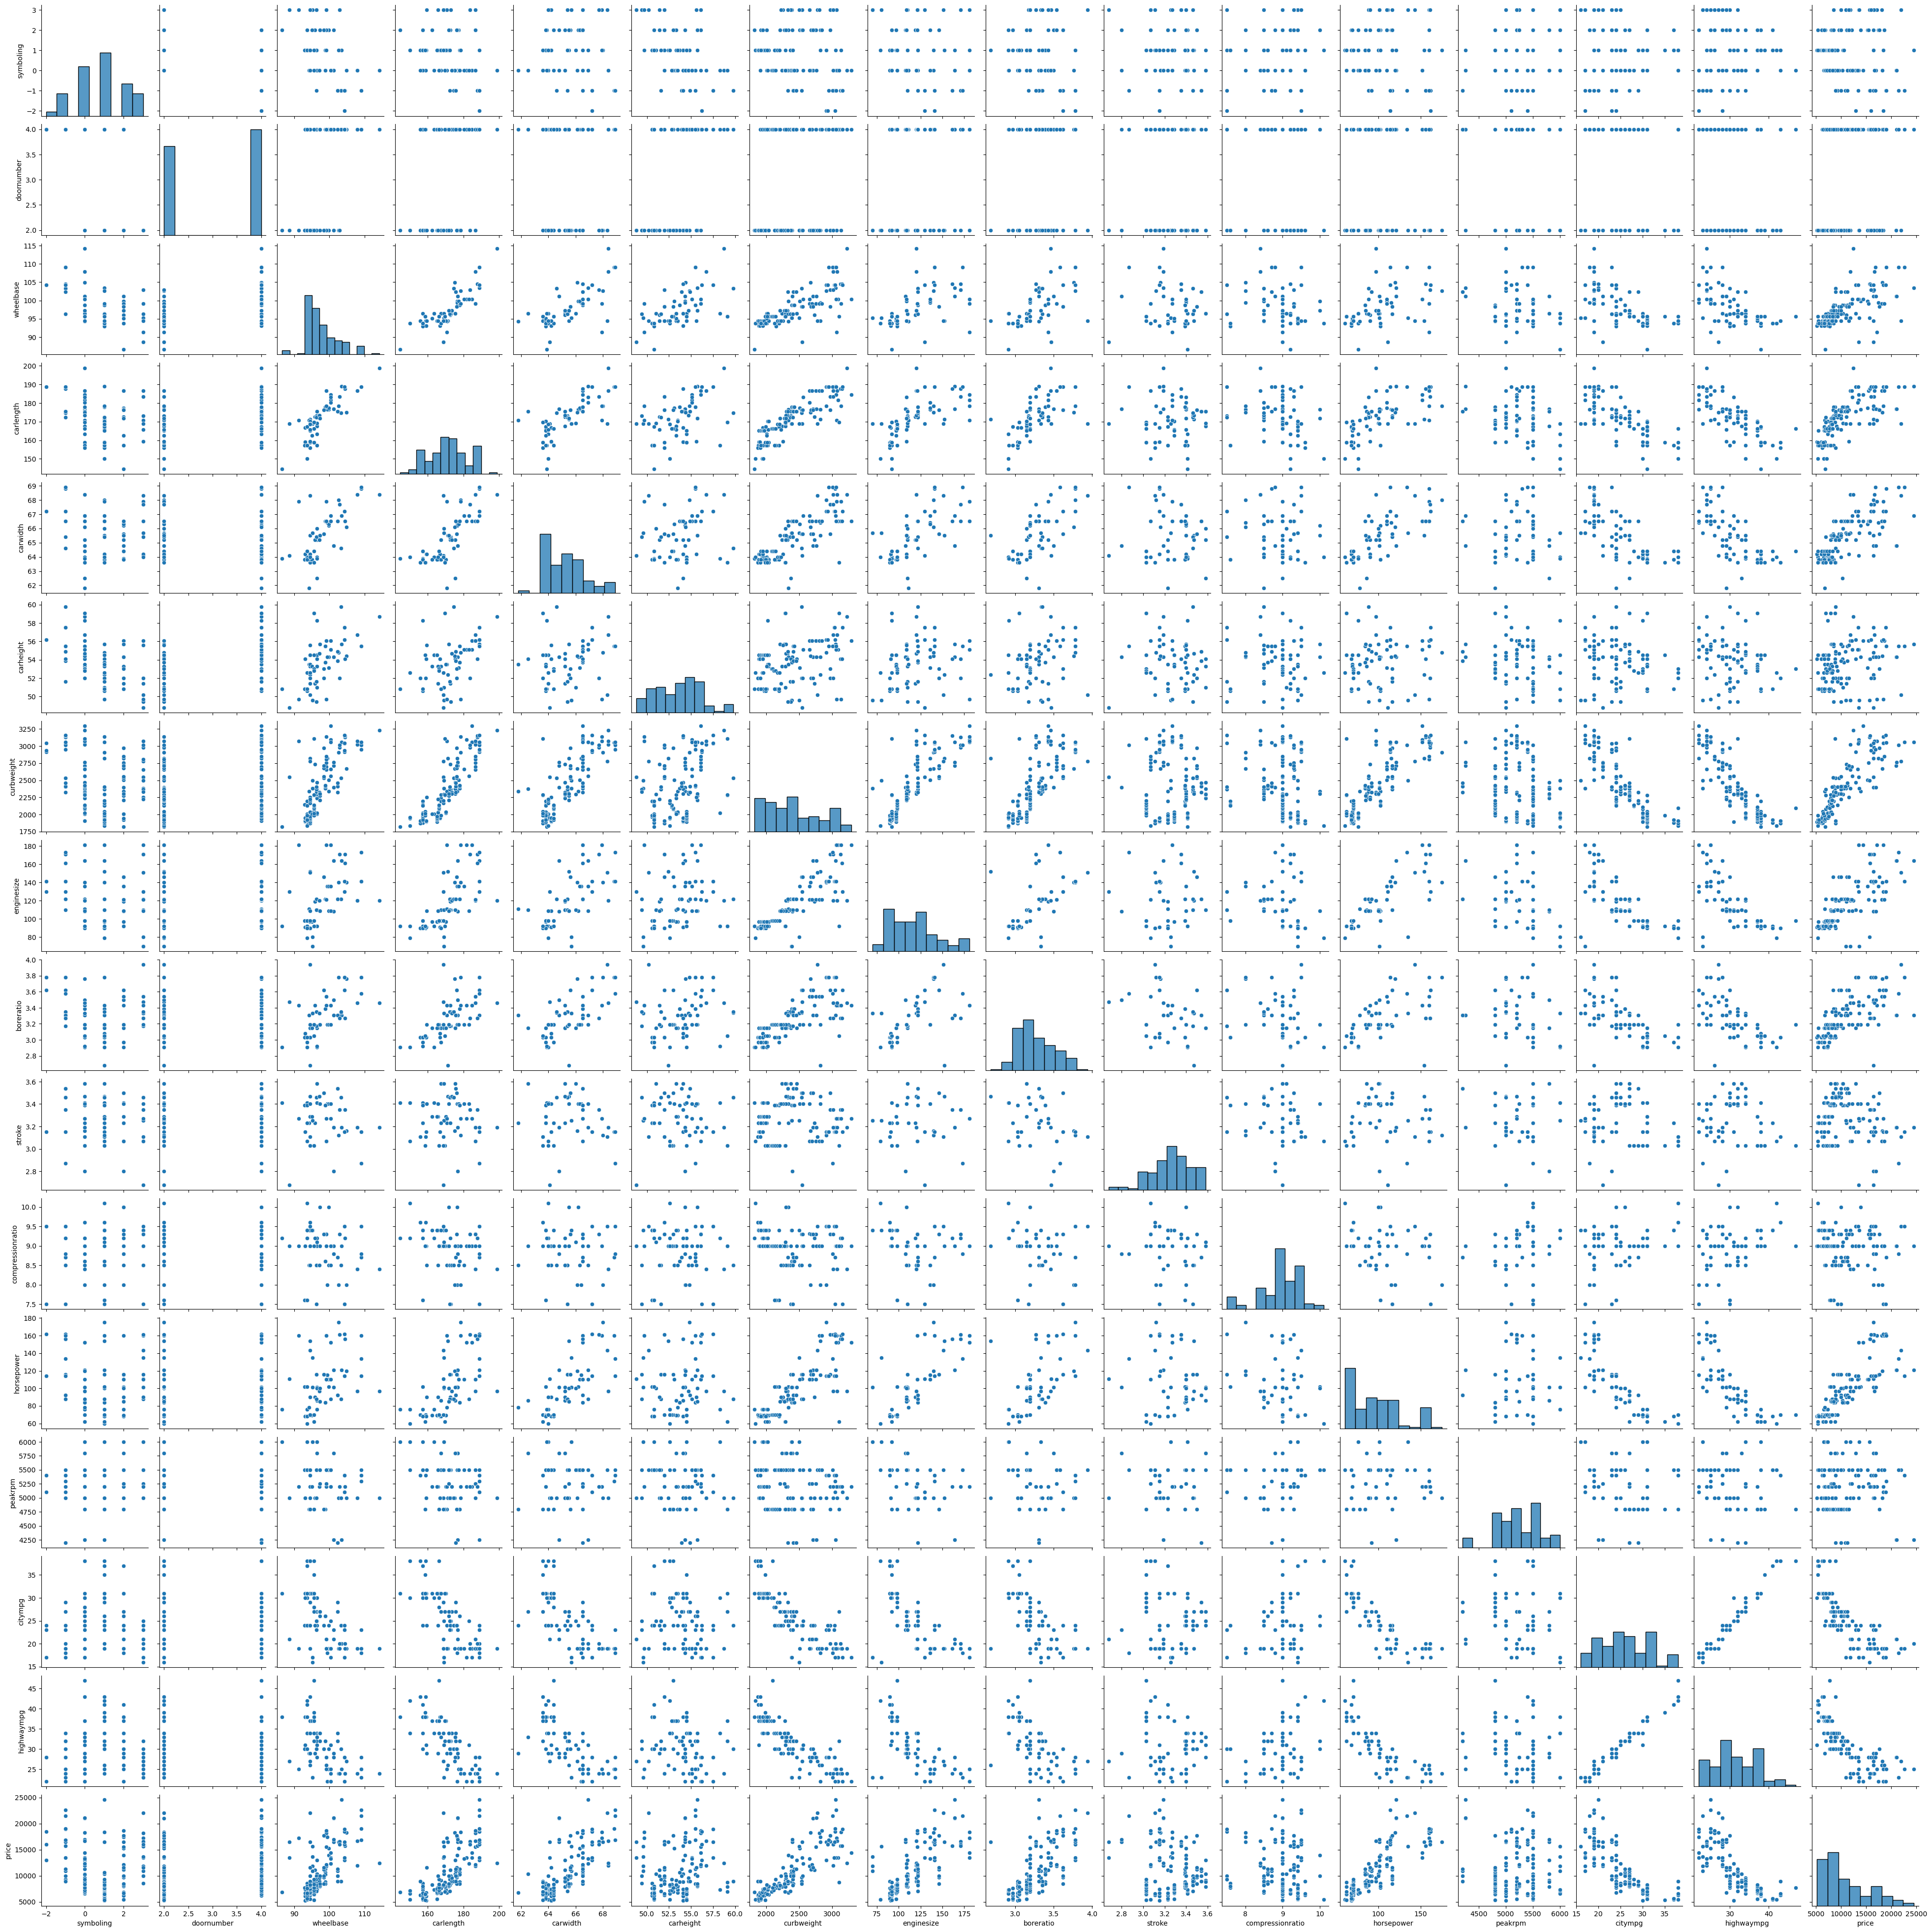

In [42]:
sns.pairplot(data=cars)

In [43]:
# Normalize numerical columns (optional, if required)
cars[numerical_columns] = (cars[numerical_columns] - cars[numerical_columns].mean()) / cars[numerical_columns].std()

In [44]:
cars

symboling fueltype aspiration  doornumber      carbody drivewheel  \
0     1.739123      gas        std   -1.087129  convertible        rwd   
1     1.739123      gas        std   -1.087129  convertible        rwd   
2     0.122968      gas        std   -1.087129    hatchback        rwd   
3     0.931046      gas        std    0.913188        sedan        fwd   
4     0.931046      gas        std    0.913188        sedan        4wd   
5     0.931046      gas        std   -1.087129        sedan        fwd   
10    0.931046      gas        std   -1.087129        sedan        rwd   
11   -0.685109      gas        std    0.913188        sedan        rwd   
12   -0.685109      gas        std   -1.087129        sedan        rwd   
13   -0.685109      gas        std    0.913188        sedan        rwd   
14    0.122968      gas        std    0.913188        sedan        rwd   
19    0.122968      gas        std   -1.087129    hatchback        fwd   
20   -0.685109      gas        std    0.913188        sedan        fwd   
21    0.122968      gas        std   -1.087129    hatchback        fwd   
22    0.122968      gas        std   -1.087129    hatchback        fwd   
23    0.122968      gas      turbo   -1.087129    hatchback        fwd   
24    0.122968      gas        std    0.913188    hatchback        fwd   
25    0.122968      gas        std    0.913188        sedan        fwd   
26    0.122968      gas        std    0.913188        sedan        fwd   
27    0.122968      gas      turbo   -1.087129        sedan        fwd   
28   -1.493187      gas        std    0.913188        wagon        fwd   
31    0.931046      gas        std   -1.087129    hatchback        fwd   
32    0.122968      gas        std   -1.087129    hatchback        fwd   
33    0.122968      gas        std   -1.087129    hatchback        fwd   
34    0.122968      gas        std   -1.087129    hatchback        fwd   
35   -0.685109      gas        std    0.913188        sedan        fwd   
36   -0.685109      gas        std    0.913188        wagon        fwd   
37   -0.685109      gas        std   -1.087129    hatchback        fwd   
38   -0.685109      gas        std   -1.087129    hatchback        fwd   
39   -0.685109      gas        std    0.913188        sedan        fwd   
40   -0.685109      gas        std    0.913188        sedan        fwd   
41   -0.685109      gas        std    0.913188        sedan        fwd   
42    0.122968      gas        std   -1.087129        sedan        fwd   
43   -0.685109      gas        std    0.913188        sedan        rwd   
44    0.122968      gas        std   -1.087129        sedan        fwd   
45   -0.685109      gas        std    0.913188        sedan        fwd   
46    0.931046      gas        std   -1.087129    hatchback        rwd   
50    0.122968      gas        std   -1.087129    hatchback        fwd   
51    0.122968      gas        std   -1.087129    hatchback        fwd   
52    0.122968      gas        std   -1.087129    hatchback        fwd   
53    0.122968      gas        std    0.913188        sedan        fwd   
54    0.122968      gas        std    0.913188        sedan        fwd   
55    1.739123      gas        std   -1.087129    hatchback        rwd   
56    1.739123      gas        std   -1.087129    hatchback        rwd   
57    1.739123      gas        std   -1.087129    hatchback        rwd   
58    1.739123      gas        std   -1.087129    hatchback        rwd   
59    0.122968      gas        std   -1.087129    hatchback        fwd   
60   -0.685109      gas        std    0.913188        sedan        fwd   
61    0.122968      gas        std   -1.087129    hatchback        fwd   
62   -0.685109      gas        std    0.913188        sedan        fwd   
64   -0.685109      gas        std    0.913188    hatchback        fwd   
65   -0.685109      gas        std    0.913188        sedan        rwd   
75    0.122968      gas      turbo   -1.087129    hatchback        rwd   
76    0.9

# Feature Selection and Splitting Data

In [45]:
X = cars.iloc[:,:-1]
y = cars.iloc[:,-1]

In [46]:
X.head()

symboling fueltype aspiration  doornumber      carbody drivewheel  \
0   1.739123      gas        std   -1.087129  convertible        rwd   
1   1.739123      gas        std   -1.087129  convertible        rwd   
2   0.122968      gas        std   -1.087129    hatchback        rwd   
3   0.931046      gas        std    0.913188        sedan        fwd   
4   0.931046      gas        std    0.913188        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  carheight  curbweight  \
0          front  -2.002614  -0.261782 -0.796172  -1.977893    0.337280   
1          front  -2.002614  -0.261782 -0.796172  -1.977893    0.337280   
2          front  -0.700899  -0.036757  0.128230  -0.495145    1.019099   
3          front   0.468438   0.469550  0.590431   0.287417   -0.185861   
4          front   0.380186   0.469550  0.722488   0.287417    1.021578   

  enginetype cylindernumber  enginesize fuelsystem  boreratio    stroke  \
0       dohc           four    0.538942       mpfi   0.819615 -3.150691   
1       dohc           four    0.538942       mpfi   0.819615 -3.150691   
2       ohcv            six    1.378033       mpfi  -2.393417  1.093574   
3        ohc           four   -0.262009       mpfi  -0.319181  0.717500   
4        ohc           five    0.767785       mpfi  -0.319181  0.717500   

   compressionratio  horsepower   peakrpm   citympg  highwaympg  
0          0.059506    0.471335 -0.532924 -0.847003   -0.807255  
1          0.059506    0.471335 -0.532924 -0.847003   -0.807255  
2          0.059506    1.935682 -0.532924 -1.208321   -0.985782  
3          1.934355    0.164844  0.686703 -0.305026   -0.271672  
4         -1.815343    0.607554  0.686703 -1.388980   -1.699892

In [47]:
X = pd.get_dummies(X)
X

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0     1.739123   -1.087129  -2.002614  -0.261782 -0.796172  -1.977893   
1     1.739123   -1.087129  -2.002614  -0.261782 -0.796172  -1.977893   
2     0.122968   -1.087129  -0.700899  -0.036757  0.128230  -0.495145   
3     0.931046    0.913188   0.468438   0.469550  0.590431   0.287417   
4     0.931046    0.913188   0.380186   0.469550  0.722488   0.287417   
5     0.931046   -1.087129   0.468438   0.535182  0.656459  -0.206833   
10    0.931046   -1.087129   0.777320   0.488302 -0.333971   0.287417   
11   -0.685109    0.913188   0.777320   0.488302 -0.333971   0.287417   
12   -0.685109   -1.087129   0.777320   0.488302 -0.333971   0.287417   
13   -0.685109    0.913188   0.777320   0.488302 -0.333971   0.287417   
14    0.122968    0.913188   1.284768   1.632179  1.052631   0.864041   
19    0.122968   -1.087129  -0.700899  -1.471292 -1.126316  -0.659895   
20   -0.685109    0.913188  -0.700899  -1.199386 -1.126316  -0.659895   
21    0.122968   -1.087129  -0.877402  -1.340027 -0.994258  -1.154144   
22    0.122968   -1.087129  -0.877402  -1.340027 -0.994258  -1.154144   
23    0.122968   -1.087129  -0.877402  -1.340027 -0.994258  -1.154144   
24    0.122968    0.913188  -0.877402  -1.340027 -0.994258  -1.236519   
25    0.122968    0.913188  -0.877402  -1.340027 -0.994258  -1.236519   
26    0.122968    0.913188  -0.877402  -1.340027 -0.994258  -1.236519   
27    0.122968   -1.087129  -0.877402  -1.340027 -0.994258  -1.236519   
28   -1.493187    0.913188   1.240642   0.282029 -0.466029   2.552727   
31    0.931046   -1.087129  -2.443873  -2.530785 -0.928230  -1.154144   
32    0.122968   -1.087129  -0.877402  -2.024478 -0.862201  -0.412770   
33    0.122968   -1.087129  -0.877402  -2.024478 -0.862201  -0.412770   
34    0.122968   -1.087129  -0.877402  -2.024478 -0.862201  -0.412770   
35   -0.685109    0.913188  -0.259640  -0.768088 -0.862201   0.369792   
36   -0.685109    0.913188  -0.259640  -1.358779 -0.928230   1.934915   
37   -0.685109   -1.087129  -0.259640  -0.383670 -0.069856  -0.124458   
38   -0.685109   -1.087129  -0.259640  -0.383670 -0.069856  -0.124458   
39   -0.685109    0.913188  -0.259640   0.357037 -0.069856   0.205042   
40   -0.685109    0.913188  -0.259640   0.357037 -1.852631   0.205042   
41   -0.685109    0.913188  -0.259640   0.357037 -0.069856   0.205042   
42    0.122968   -1.087129  -0.259640  -0.233654  0.458373  -1.071769   
43   -0.685109    0.913188  -0.745025  -0.083637 -2.314832  -0.042083   
44    0.122968   -1.087129  -0.700899  -1.471292 -1.126316  -0.659895   
45   -0.685109    0.913188  -0.700899  -1.471292 -1.126316  -0.659895   
46    0.931046   -1.087129  -0.369954   0.094508 -0.069856  -0.907019   
50    0.122968   -1.087129  -1.009780  -1.171258 -0.730143   0.205042   
51    0.122968   -1.087129  -1.009780  -1.171258 -0.730143   0.205042   
52    0.122968   -1.087129  -1.009780  -1.171258 -0.730143   0.205042   
53    0.122968    0.913188  -1.009780  -0.449303 -0.730143   0.205042   
54    0.122968    0.913188  -1.009780  -0.449303 -0.730143   0.205042   
55    1.739123   -1.087129  -0.524395  -0.243030  0.260287  -1.648394   
56    1.739123   -1.087129  -0.524395  -0.243030  0.260287  -1.648394   
57    1.739123   -1.087129  -0.524395  -0.243030  0.260287  -1.648394   
58    1.739123   -1.087129  -0.524395  -0.243030  0.260287  -1.648394   
59    0.122968   -1.087129   0.247809   0.582062  0.788517   0.040292   
60   -0.685109    0.913188   0.247809   0.582062  0.788517   0.781666   
61    0.122968   -1.087129   0.247809   0.582062  0.788517   0.040292   
62   -0.685109    0.913188   0.247809   0.582062  0.788517   0.781666   
64   -0.685109    0.913188   0.247809   0.582062  0.788517   0.781666   
65   -0.685109    0.913188   1.593649   0.319533  0.524402   0.328604   
75    0.122968   -1.087129   1.108264   0.638318  1.778947   0.493354   
76    0.931046   -1.087129  -0.877402  -1.340027 -0.598086  -1.

In [48]:
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
X= pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [49]:
X

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0     1.745459   -1.091089  -2.009909  -0.262736 -0.799073  -1.985099   
1     1.745459   -1.091089  -2.009909  -0.262736 -0.799073  -1.985099   
2     0.123416   -1.091089  -0.703452  -0.036891  0.128697  -0.496949   
3     0.934438    0.916515   0.470145   0.471260  0.592581   0.288464   
4     0.934438    0.916515   0.381571   0.471260  0.725120   0.288464   
5     0.934438   -1.091089   0.470145   0.537132  0.658851  -0.207586   
6     0.934438   -1.091089   0.780152   0.490081 -0.335188   0.288464   
7    -0.687605    0.916515   0.780152   0.490081 -0.335188   0.288464   
8    -0.687605   -1.091089   0.780152   0.490081 -0.335188   0.288464   
9    -0.687605    0.916515   0.780152   0.490081 -0.335188   0.288464   
10    0.123416    0.916515   1.289448   1.638125  1.056466   0.867189   
11    0.123416   -1.091089  -0.703452  -1.476652 -1.130419  -0.662299   
12   -0.687605    0.916515  -0.703452  -1.203756 -1.130419  -0.662299   
13    0.123416   -1.091089  -0.880599  -1.344909 -0.997880  -1.158349   
14    0.123416   -1.091089  -0.880599  -1.344909 -0.997880  -1.158349   
15    0.123416   -1.091089  -0.880599  -1.344909 -0.997880  -1.158349   
16    0.123416    0.916515  -0.880599  -1.344909 -0.997880  -1.241024   
17    0.123416    0.916515  -0.880599  -1.344909 -0.997880  -1.241024   
18    0.123416    0.916515  -0.880599  -1.344909 -0.997880  -1.241024   
19    0.123416   -1.091089  -0.880599  -1.344909 -0.997880  -1.241024   
20   -1.498626    0.916515   1.245162   0.283056 -0.467726   2.562027   
21    0.934438   -1.091089  -2.452776  -2.540004 -0.931611  -1.158349   
22    0.123416   -1.091089  -0.880599  -2.031854 -0.865342  -0.414274   
23    0.123416   -1.091089  -0.880599  -2.031854 -0.865342  -0.414274   
24    0.123416   -1.091089  -0.880599  -2.031854 -0.865342  -0.414274   
25   -0.687605    0.916515  -0.260585  -0.770886 -0.865342   0.371139   
26   -0.687605    0.916515  -0.260585  -1.363729 -0.931611   1.941964   
27   -0.687605   -1.091089  -0.260585  -0.385068 -0.070111  -0.124911   
28   -0.687605   -1.091089  -0.260585  -0.385068 -0.070111  -0.124911   
29   -0.687605    0.916515  -0.260585   0.358338 -0.070111   0.205789   
30   -0.687605    0.916515  -0.260585   0.358338 -1.859381   0.205789   
31   -0.687605    0.916515  -0.260585   0.358338 -0.070111   0.205789   
32    0.123416   -1.091089  -0.260585  -0.234505  0.460043  -1.075674   
33   -0.687605    0.916515  -0.747739  -0.083942 -2.323265  -0.042236   
34    0.123416   -1.091089  -0.703452  -1.476652 -1.130419  -0.662299   
35   -0.687605    0.916515  -0.703452  -1.476652 -1.130419  -0.662299   
36    0.934438   -1.091089  -0.371302   0.094852 -0.070111  -0.910324   
37    0.123416   -1.091089  -1.013459  -1.175525 -0.732803   0.205789   
38    0.123416   -1.091089  -1.013459  -1.175525 -0.732803   0.205789   
39    0.123416   -1.091089  -1.013459  -1.175525 -0.732803   0.205789   
40    0.123416    0.916515  -1.013459  -0.450940 -0.732803   0.205789   
41    0.123416    0.916515  -1.013459  -0.450940 -0.732803   0.205789   
42    1.745459   -1.091089  -0.526305  -0.243915  0.261235  -1.654399   
43    1.745459   -1.091089  -0.526305  -0.243915  0.261235  -1.654399   
44    1.745459   -1.091089  -0.526305  -0.243915  0.261235  -1.654399   
45    1.745459   -1.091089  -0.526305  -0.243915  0.261235  -1.654399   
46    0.123416   -1.091089   0.248711   0.584183  0.791389   0.040439   
47   -0.687605    0.916515   0.248711   0.584183  0.791389   0.784514   
48    0.123416   -1.091089   0.248711   0.584183  0.791389   0.040439   
49   -0.687605    0.916515   0.248711   0.584183  0.791389   0.784514   
50   -0.687605    0.916515   0.248711   0.584183  0.791389   0.784514   
51   -0.687605    0.916515   1.599455   0.320697  0.526312   0.329801   
52    0.123416   -1.091089   1.112302   0.640644  1.785428   0.495151   
53    0.934438   -1.091089  -0.880599  -1.344909 -0.600265  -1.

In [50]:
y.head()

0    0.564302
1    1.232312
2    1.232312
3    0.665448
4    1.443496
Name: price, dtype: float64

In [51]:
#Split the data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=1)

In [54]:
xtrain.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
39    0.123416   -1.091089  -1.013459  -1.175525 -0.732803   0.205789   
69    0.123416    0.916515  -0.703452  -0.592093 -0.997880   0.371139   
114  -1.498626    0.916515   1.045872   0.377158  0.791389   0.536489   
108   0.934438   -1.091089   0.160138   0.433619  0.194966  -0.662299   
11    0.123416   -1.091089  -0.703452  -1.476652 -1.130419  -0.662299   

     curbweight  enginesize  boreratio    stroke  compressionratio  \
39    -1.261515   -0.951993  -0.973455 -0.627901          0.059723   
69    -1.097282   -0.722316  -0.483622  0.126987          0.812394   
114    0.005067    0.234670   0.169489  1.475002         -0.504781   
108    0.345974    1.153376   1.434893  1.259319          0.624226   
11    -1.338654   -0.990273  -0.973455 -0.843584          1.188730   

     horsepower   peakrpm   citympg  highwaympg  fueltype_gas  aspiration_std  \
39    -0.996630 -0.534865  0.963083    1.160761           0.0         0.32249   
69    -0.962451 -0.045237  0.963083    0.981583           0.0         0.32249   
114   -0.176342 -2.493377  0.237815    0.085694           0.0         0.32249   
108    0.643946 -1.024493 -0.306137   -0.272662           0.0         0.32249   
11    -0.928272  0.444391  2.232303    2.056650           0.0         0.32249   

     aspiration_turbo  carbody_convertible  carbody_hardtop  \
39           -0.32249            -0.172774        -0.172774   
69           -0.32249            -0.172774        -0.172774   
114          -0.32249            -0.172774        -0.172774   
108          -0.32249            -0.172774        -0.172774   
11           -0.32249            -0.172774        -0.172774   

     carbody_hatchback  carbody_sedan  carbody_wagon  drivewheel_4wd  \
39            1.286019      -0.916515      -0.349215       -0.149071   
69           -0.777593       1.091089      -0.349215       -0.149071   
114          -0.777593       1.091089      -0.349215       -0.149071   
108           1.286019      -0.916515      -0.349215       -0.149071   
11            1.286019      -0.916515      -0.349215       -0.149071   

     drivewheel_fwd  drivewheel_rwd  enginelocation_front  enginetype_dohc  \
39         0.718668       -0.684167                   0.0        -0.248069   
69         0.718668       -0.684167                   0.0        -0.248069   
114        0.718668       -0.684167                   0.0        -0.248069   
108       -1.391463        1.461630                   0.0        -0.248069   
11         0.718668       -0.684167                   0.0        -0.248069   

     enginetype_l  enginetype_ohc  enginetype_ohcv  enginetype_rotor  \
39      -0.149071        0.435494         -0.23116         -0.172774   
69      -0.149071        0.435494         -0.23116         -0.172774   
114     -0.149071        0.435494         -0.23116         -0.172774   
108     -0.149071        0.435494         -0.23116         -0.172774   
11      -0.149071        0.435494         -0.23116         -0.172774   

     cylindernumber_five  cylindernumber_four  cylindernumber_six  \
39             -0.149071             0.423659           -0.336011   
69             -0.149071             0.423659           -0.336011   
114            -0.149071             0.423659           -0.336011   
108            -0.149071             0.423659           -0.336011   
11             -0.149071             0.423659           -0.336011   

     cylindernumber_two  fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  \
39            -0.172774        -0.279508         1.210077        -0.149071   
69            -0.172774        -0.279508         1.210077        -0.149071   
114           -0.172774        -0.279508        -0.826394        -0.149071   
108           -0.172774        -0.279508        -0.826394        -0.149071   
11            -0.172774        -0.279508         1.210077        -0.149071   

     fuelsystem_mpfi  fuelsystem_spdi  fuelsystem_spfi  
39 

In [55]:
xtest.head()

symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
35  -0.687605    0.916515  -0.703452  -1.476652 -1.130419  -0.662299   
33  -0.687605    0.916515  -0.747739  -0.083942 -2.323265  -0.042236   
77   1.745459   -1.091089  -1.412039  -0.083942  1.719159  -1.613061   
5    0.934438   -1.091089   0.470145   0.537132  0.658851  -0.207586   
19   0.123416   -1.091089  -0.880599  -1.344909 -0.997880  -1.241024   

    curbweight  enginesize  boreratio    stroke  compressionratio  horsepower  \
35   -1.251561   -0.990273  -0.973455 -0.843584          1.188730   -0.928272   
33   -0.186538   -0.186404   0.169489 -0.196537         -0.881116   -0.654843   
77    1.639928    2.493157   0.659323  0.019146          0.059723    2.147806   
5     0.236486    0.770582  -0.320344  0.720113         -0.881116    0.438874   
19   -0.549840   -0.684037  -0.973455  0.666193         -2.574627    0.165444   

     peakrpm   citympg  highwaympg  fueltype_gas  aspiration_std  \
35  0.444391  2.232303    2.056650           0.0        0.322490   
33 -1.024493 -0.306137   -0.451840           0.0        0.322490   
77 -0.045237 -1.212723   -1.168551           0.0        0.322490   
5   0.689204 -1.212723   -1.168551           0.0        0.322490   
19  0.689204 -0.306137   -0.272662           0.0       -3.100868   

    aspiration_turbo  carbody_convertible  carbody_hardtop  carbody_hatchback  \
35         -0.322490            -0.172774        -0.172774          -0.777593   
33         -0.322490            -0.172774        -0.172774          -0.777593   
77         -0.322490            -0.172774        -0.172774           1.286019   
5          -0.322490            -0.172774        -0.172774          -0.777593   
19          3.100868            -0.172774        -0.172774          -0.777593   

    carbody_sedan  carbody_wagon  drivewheel_4wd  drivewheel_fwd  \
35       1.091089      -0.349215       -0.149071        0.718668   
33       1.091089      -0.349215       -0.149071       -1.391463   
77      -0.916515      -0.349215       -0.149071       -1.391463   
5        1.091089      -0.349215       -0.149071        0.718668   
19       1.091089      -0.349215       -0.149071        0.718668   

    drivewheel_rwd  enginelocation_front  enginetype_dohc  enginetype_l  \
35       -0.684167                   0.0        -0.248069     -0.149071   
33        1.461630                   0.0        -0.248069     -0.149071   
77        1.461630                   0.0        -0.248069     -0.149071   
5        -0.684167                   0.0        -0.248069     -0.149071   
19       -0.684167                   0.0        -0.248069     -0.149071   

    enginetype_ohc  enginetype_ohcv  enginetype_rotor  cylindernumber_five  \
35        0.435494        -0.231160         -0.172774            -0.149071   
33        0.435494        -0.231160         -0.172774            -0.149071   
77       -2.296242         4.326001         -0.172774            -0.149071   
5         0.435494        -0.231160         -0.172774             6.708204   
19        0.435494        -0.231160         -0.172774            -0.149071   

    cylindernumber_four  cylindernumber_six  cylindernumber_two  \
35             0.423659           -0.336011           -0.172774   
33             0.423659           -0.336011           -0.172774   
77            -2.360387            2.976095           -0.172774   
5             -2.360387           -0.336011           -0.172774   
19             0.423659           -0.336011           -0.172774   

    fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_mpfi  \
35        -0.279508         1.210077        -0.149071        -0.916515   
33        -0.279508         1.210077        -0.149071        -0.916515   
77        -0.279508        -0.826394        -0.149071         1.091089   
5         -0.279508        -0.826394        -0.149071         1.091089   
19        -0.279508        -0.826394        -0.149071         1.091089   

    fuelsys

In [56]:
ytrain.head()

52    -0.925104
96    -0.768605
176   -0.013009
169   -0.215079
19    -1.036253
Name: price, dtype: float64

In [57]:
ytest.head()

45    -0.453496
43    -0.927327
104    1.387699
5      0.954438
27    -0.533190
Name: price, dtype: float64

# Model Building

In [58]:
def evaluate_regression_models(X, y, test_size=0.25, random_state=1):
    results = {}
    # Split the data into training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size, random_state=random_state)
    # List of regression models to evaluate
    models = {
        'Linear Regression': LinearRegression(),
        'Polynomial Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'Support Vector Regression': SVR(),
        'Decision Tree Regression': DecisionTreeRegressor(),
        'Random Forest Regression': RandomForestRegressor(),
        'Gradient Boosting Regression': GradientBoostingRegressor(),
        'K-Nearest Neighbors Regression': KNeighborsRegressor(),
        'Neural Network Regression': MLPRegressor(max_iter=1000, random_state=random_state)
    }
    
    for model_name, model in models.items():
        # Fit the model to the training data
        model.fit(xtrain, ytrain)
        # Make predictions on the test set
        y_pred = model.predict(xtest)
        # Calculate evaluation metrics
        mae = mean_absolute_error(ytest, y_pred)
        mse = mean_squared_error(ytest, y_pred)
        rmse = mean_squared_error(ytest, y_pred, squared=False)
        r2 = r2_score(ytest, y_pred)
        # Store the results in the dictionary
        results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
    return results

In [59]:
results = evaluate_regression_models(X, y)
# Print the evaluation metrics for each model
for model_name, metrics in results.items():
    print(f"Model Name: {model_name}")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R2 Score: {metrics['R2 Score']:.2f}")
    print()

Model Name: Linear Regression
MAE: 0.40
MSE: 0.21
RMSE: 0.46
R2 Score: 0.75

Model Name: Polynomial Regression
MAE: 0.40
MSE: 0.21
RMSE: 0.46
R2 Score: 0.75

Model Name: Ridge Regression
MAE: 0.36
MSE: 0.18
RMSE: 0.43
R2 Score: 0.78

Model Name: Lasso Regression
MAE: 0.83
MSE: 0.85
RMSE: 0.92
R2 Score: -0.00

Model Name: ElasticNet Regression
MAE: 0.60
MSE: 0.46
RMSE: 0.68
R2 Score: 0.46

Model Name: Support Vector Regression
MAE: 0.23
MSE: 0.11
RMSE: 0.33
R2 Score: 0.87

Model Name: Decision Tree Regression
MAE: 0.33
MSE: 0.19
RMSE: 0.43
R2 Score: 0.78

Model Name: Random Forest Regression
MAE: 0.25
MSE: 0.12
RMSE: 0.34
R2 Score: 0.86

Model Name: Gradient Boosting Regression
MAE: 0.26
MSE: 0.13
RMSE: 0.35
R2 Score: 0.85

Model Name: K-Nearest Neighbors Regression
MAE: 0.33
MSE: 0.20
RMSE: 0.44
R2 Score: 0.77

Model Name: Neural Network Regression
MAE: 0.39
MSE: 0.29
RMSE: 0.54
R2 Score: 0.66



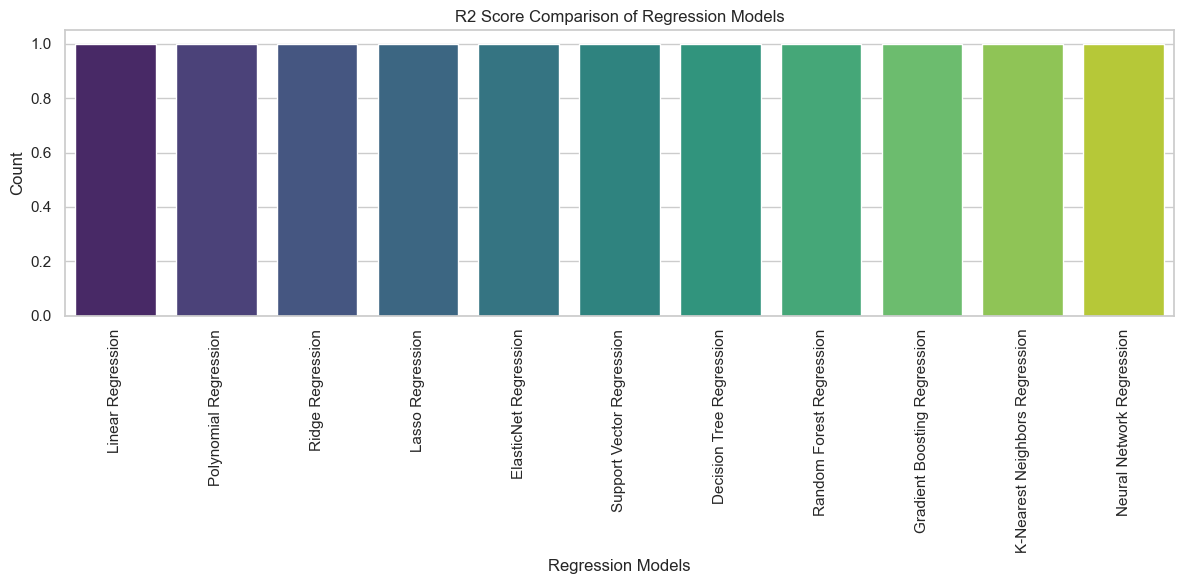

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X and y are your feature matrix and target vector
results = evaluate_regression_models(X, y)

# Create a countplot for R2 scores
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(x=list(results.keys()), palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Regression Models")
plt.title("R2 Score Comparison of Regression Models")
plt.tight_layout()
plt.show()

based on this comparison, the Support Vector Regression model with an R2 score of 0.87 is recommended for predicting car prices in this particular dataset

# Hyperparameter tunning

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import r2_score


# Hyperparameter grid for SVR
param_grid = {'C': [1, 10, 100], 'epsilon': [0.01, 0.1, 0.5]}

# Create SVR model
svr = SVR()

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2')
grid_search.fit(xtrain, ytrain)

# Get the best SVR model after hyperparameter tuning
best_svr = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svr.predict(xtest)

# Calculate evaluation metrics
mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
r2 = r2_score(ytest, y_pred)

# Print the evaluation metrics
print("Best Parameters:", best_svr.get_params())
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Best Parameters: {'C': 1, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MAE: 0.2280722688812395
MSE: 0.10670895611335492
RMSE: 0.3266633681840603
R2 Score: 0.8745942371052342


In [62]:
r2_percentage = round(r2 * 100, 2)  # Convert R2 score to percentage with 2 decimal places
print(f"R2 Score: {r2_percentage}%")

R2 Score: 87.46%


# Model Saving

In [63]:
import joblib
# Save the trained model using joblib
joblib.dump(best_svr, 'svr_model.joblib')

['svr_model.joblib']